# 1. Fillup column "Mobile and Voice Traffic" with datata

### a. Predict Past Values:

   Year  Predicted Mobile and Voice Traffic
0  2000                            0.000087
1  2001                            0.000139
2  2002                            0.000222
3  2003                            0.000353
4  2004                            0.000562
5  2005                            0.000895
6  2006                            0.001424
7  2007                            0.002268
8  2008                            0.003612
9  2009                            0.005751


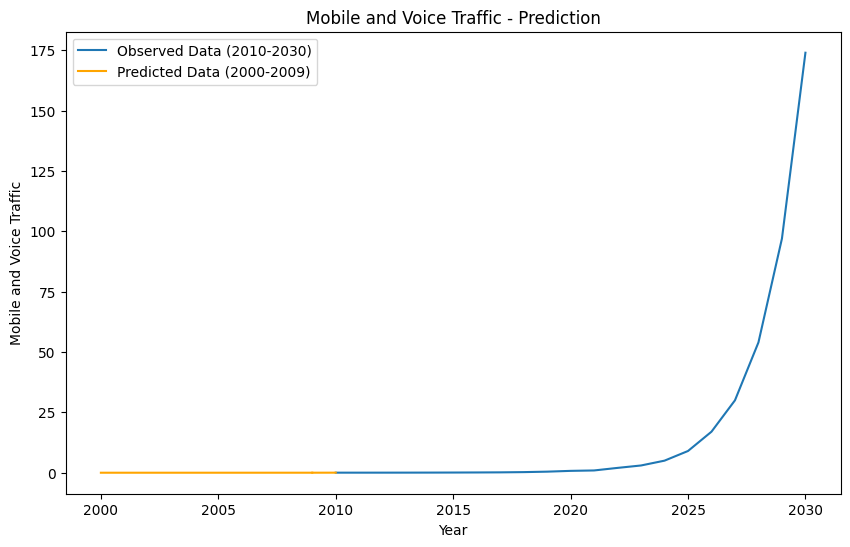

In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

# Prepare the data
data = {
    "Year": np.arange(2010, 2031),
    "Mobile and Voice Traffic": [0.023, 0.025, 0.03, 0.038, 0.052, 0.075, 0.108, 0.153, 0.25, 0.44, 0.77, 0.94, 2, 3, 5, 9, 17, 30, 54, 97, 174]
}

df = pd.DataFrame(data)

# Reverse the data for backcasting
df_reversed = df[::-1].reset_index(drop=True)

# Train a linear regression model
X = df_reversed['Year'].values.reshape(-1, 1)
y = np.log(df_reversed['Mobile and Voice Traffic'].values.reshape(-1, 1))

# Scale the features and target
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()

X_scaled = scaler_X.fit_transform(X)
y_scaled = scaler_y.fit_transform(y)

# Fit the linear regression model
model = LinearRegression()
model.fit(X_scaled, y_scaled)

# Predict for the years 2000 to 2009
years_to_predict = np.arange(2000, 2010).reshape(-1, 1)
years_to_predict_scaled = scaler_X.transform(years_to_predict)
predictions_scaled = model.predict(years_to_predict_scaled)
predictions_log = scaler_y.inverse_transform(predictions_scaled)
predictions = np.exp(predictions_log)

# Print the predicted values
predicted_values = pd.DataFrame({
    "Year": years_to_predict.flatten(),
    "Predicted Mobile and Voice Traffic": predictions.flatten()
})
print(predicted_values)

# Plot the results
plt.figure(figsize=(10, 6))

plt.plot(df['Year'], df['Mobile and Voice Traffic'], label='Observed Data (2010-2030)')
plt.plot([predicted_values['Year'].iloc[-1], df['Year'].iloc[0]], [predicted_values['Predicted Mobile and Voice Traffic'].iloc[-1], df['Mobile and Voice Traffic'].iloc[0]], color='orange')
plt.plot(predicted_values['Year'], predicted_values['Predicted Mobile and Voice Traffic'], label='Predicted Data (2000-2009)', color='orange')

plt.title('Mobile and Voice Traffic - Prediction')
plt.xlabel('Year')
plt.ylabel('Mobile and Voice Traffic')
plt.legend()
plt.show()


### b. Future value predictions:

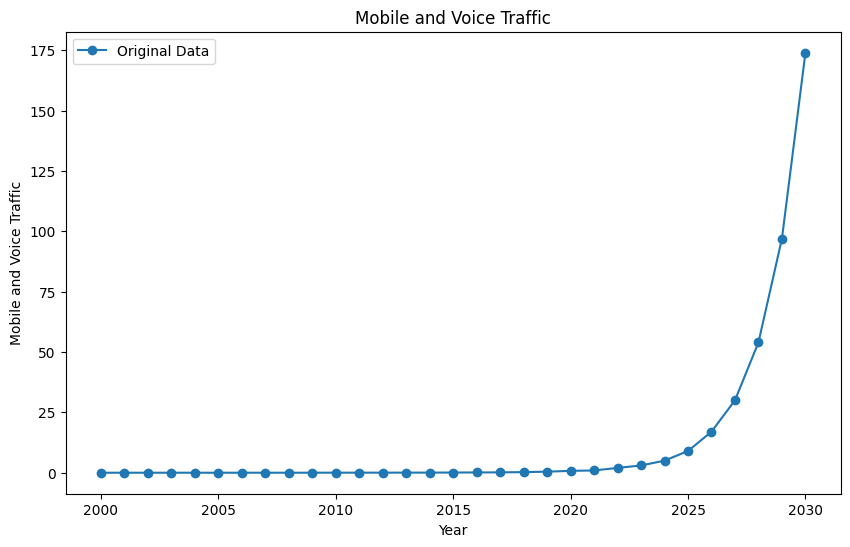

Mean Squared Error for each model:
Linear Regression: 711.0526010905146
Ridge Regression: 710.7980791768301
Lasso Regression: 708.9233991647241
SVR: 832.9947436480383

Best model: Lasso Regression


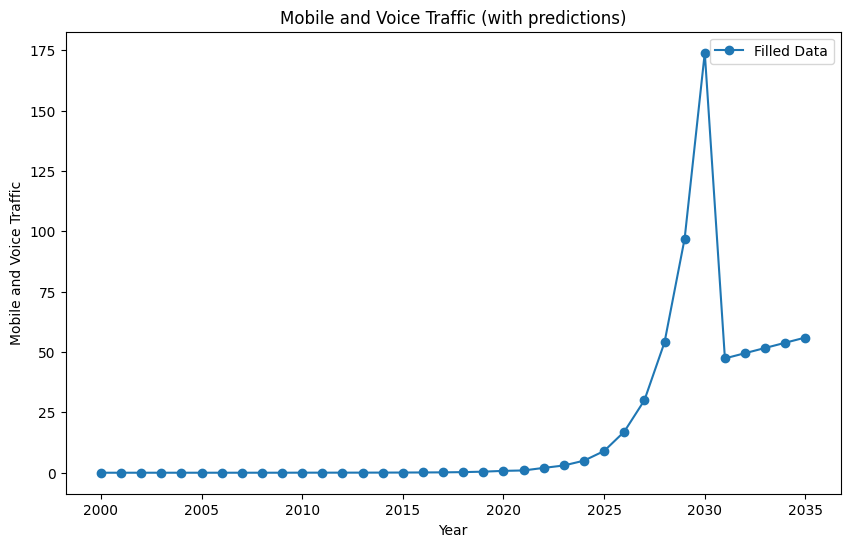


Filled DataFrame:
    Year  Mobile and Voice Traffic
0   2000                  0.000087
1   2001                  0.000139
2   2002                  0.000222
3   2003                  0.000353
4   2004                  0.000562
5   2005                  0.000895
6   2006                  0.001424
7   2007                  0.002268
8   2008                  0.003612
9   2009                  0.005751
10  2010                  0.023000
11  2011                  0.025000
12  2012                  0.030000
13  2013                  0.038000
14  2014                  0.052000
15  2015                  0.075000
16  2016                  0.108000
17  2017                  0.153000
18  2018                  0.250000
19  2019                  0.440000
20  2020                  0.770000
21  2021                  0.940000
22  2022                  2.000000
23  2023                  3.000000
24  2024                  5.000000
25  2025                  9.000000
26  2026                 17.000000
2

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Prepare the data
data = {
    "Year": np.arange(2000, 2036),
    "Mobile and Voice Traffic": [0.000087, 0.000139, 0.000222, 0.000353, 0.000562, 0.000895, 0.001424, 
                                 0.002268, 0.003612, 0.005751, 0.023, 0.025, 0.03, 0.038, 0.052, 0.075, 
                                 0.108, 0.153, 0.25, 0.44, 0.77, 0.94, 2, 3, 5, 9, 17, 30, 54, 97, 174, np.nan, np.nan, np.nan, np.nan, np.nan],
}

# Create DataFrame
df = pd.DataFrame(data)

# Plot the original data
plt.figure(figsize=(10, 6))
plt.plot(df['Year'], df['Mobile and Voice Traffic'], label='Original Data', marker='o')
plt.xlabel('Year')
plt.ylabel('Mobile and Voice Traffic')
plt.title('Mobile and Voice Traffic')
plt.legend()
plt.show()

# Split the data into known and missing
known_data = df.dropna()
missing_data = df[df.isna().any(axis=1)]

# Prepare the feature matrix X and target vector y for training
X = known_data[['Year']]
y = known_data['Mobile and Voice Traffic']

# Train regression models
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(),
    "Lasso Regression": Lasso(),
    "SVR": SVR()
}

results = {}
for name, model in models.items():
    # Split the known data into training and validation sets
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=21)
    
    # Train the model
    model.fit(X_train, y_train)
    
    # Validate the model
    y_pred_val = model.predict(X_val)
    mse = mean_squared_error(y_val, y_pred_val)
    results[name] = mse

# Print MSE for each model
print("Mean Squared Error for each model:")
for name, mse in results.items():
    print(f"{name}: {mse}")

# Select the best model (with the lowest MSE)
best_model_name = min(results, key=results.get)
best_model = models[best_model_name]
print(f"\nBest model: {best_model_name}")

# Train the best model on the entire known dataset
best_model.fit(X, y)

# Predict the missing values
X_missing = missing_data[['Year']]
y_missing_pred = best_model.predict(X_missing)

# Fill the missing values in the original dataframe
df.loc[df.isna().any(axis=1), 'Mobile and Voice Traffic'] = y_missing_pred

# Plot the filled data
plt.figure(figsize=(10, 6))
plt.plot(df['Year'], df['Mobile and Voice Traffic'], label='Filled Data', marker='o')
plt.xlabel('Year')
plt.ylabel('Mobile and Voice Traffic')
plt.title('Mobile and Voice Traffic (with predictions)')
plt.legend()
plt.show()

# Print the filled dataframe
print("\nFilled DataFrame:")
print(df)


# 2. Fillup column "Fixed data traffic wired" with data

### a. Previous value predict

   Year  Predicted Fixed data traffic wired
0  2000                            0.034073
1  2001                            0.042968
2  2002                            0.054185
3  2003                            0.068329
4  2004                            0.086166
5  2005                            0.108659
6  2006                            0.137024
7  2007                            0.172793
8  2008                            0.217900
9  2009                            0.274781


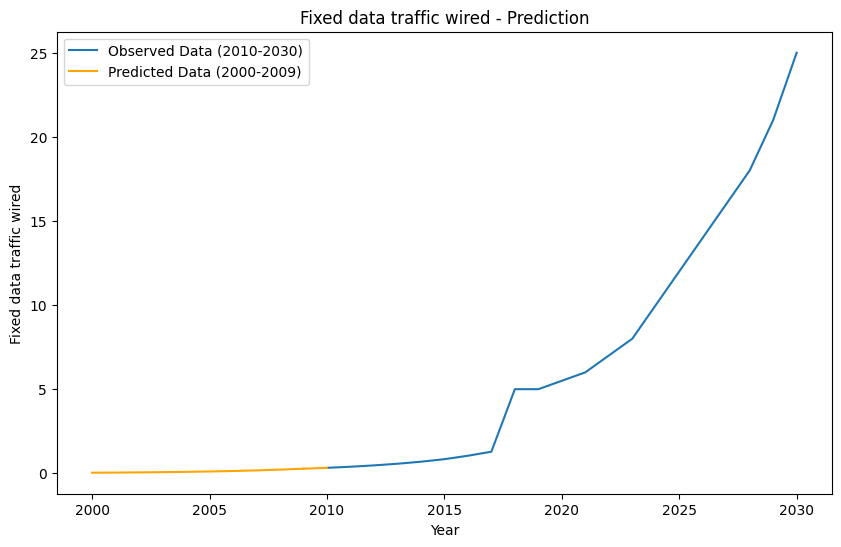

In [4]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

# Prepare the data
data = {
    "Year": np.arange(2010, 2031),
    "Fixed data traffic wired": [0.325, 0.39, 0.47, 0.568, 0.689, 0.839, 1.043, 1.283, 5, 5, 5.5, 6, 7, 8, 10, 12, 14, 16, 18, 21, 25]
}

df = pd.DataFrame(data)

# Reverse the data for backcasting
df_reversed = df[::-1].reset_index(drop=True)

# Train a linear regression model
X = df_reversed['Year'].values.reshape(-1, 1)
y = np.log(df_reversed['Fixed data traffic wired'].values.reshape(-1, 1))

# Scale the features and target
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()

X_scaled = scaler_X.fit_transform(X)
y_scaled = scaler_y.fit_transform(y)

# Fit the linear regression model
model = LinearRegression()
model.fit(X_scaled, y_scaled)

# Predict for the years 2000 to 2009
years_to_predict = np.arange(2000, 2010).reshape(-1, 1)
years_to_predict_scaled = scaler_X.transform(years_to_predict)
predictions_scaled = model.predict(years_to_predict_scaled)
predictions_log = scaler_y.inverse_transform(predictions_scaled)
predictions = np.exp(predictions_log)

# Print the predicted values
predicted_values = pd.DataFrame({
    "Year": years_to_predict.flatten(),
    "Predicted Fixed data traffic wired": predictions.flatten()
})
print(predicted_values)

# Plot the results
plt.figure(figsize=(10, 6))

plt.plot(df['Year'], df['Fixed data traffic wired'], label='Observed Data (2010-2030)')
plt.plot([predicted_values['Year'].iloc[-1], df['Year'].iloc[0]], [predicted_values['Predicted Fixed data traffic wired'].iloc[-1], df['Fixed data traffic wired'].iloc[0]], color='orange')
plt.plot(predicted_values['Year'], predicted_values['Predicted Fixed data traffic wired'], label='Predicted Data (2000-2009)', color='orange')

plt.title('Fixed data traffic wired - Prediction')
plt.xlabel('Year')
plt.ylabel('Fixed data traffic wired')
plt.legend()
plt.show()


### b. Future value prediction

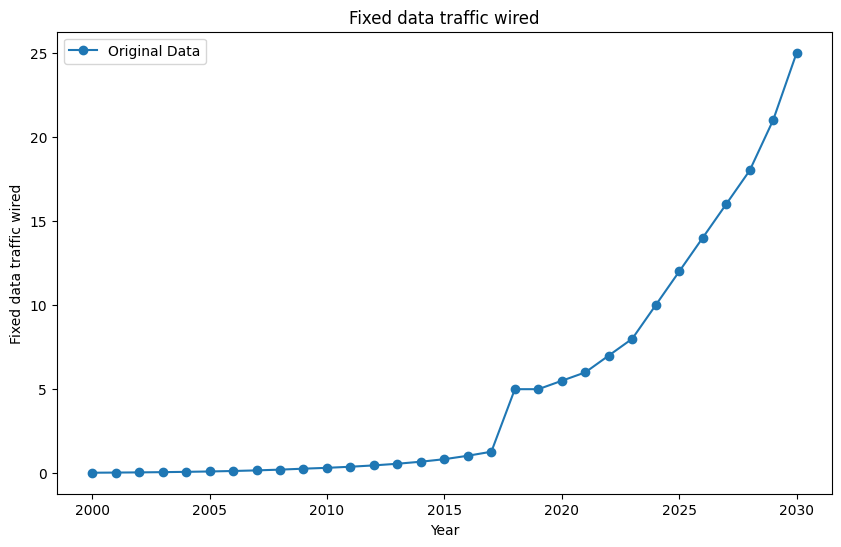

Mean Squared Error for each model:
Linear Regression: 10.319627127420956
Ridge Regression: 10.313379028601231
Lasso Regression: 10.145086857742939
SVR: 19.0137198862161

Best model: Lasso Regression


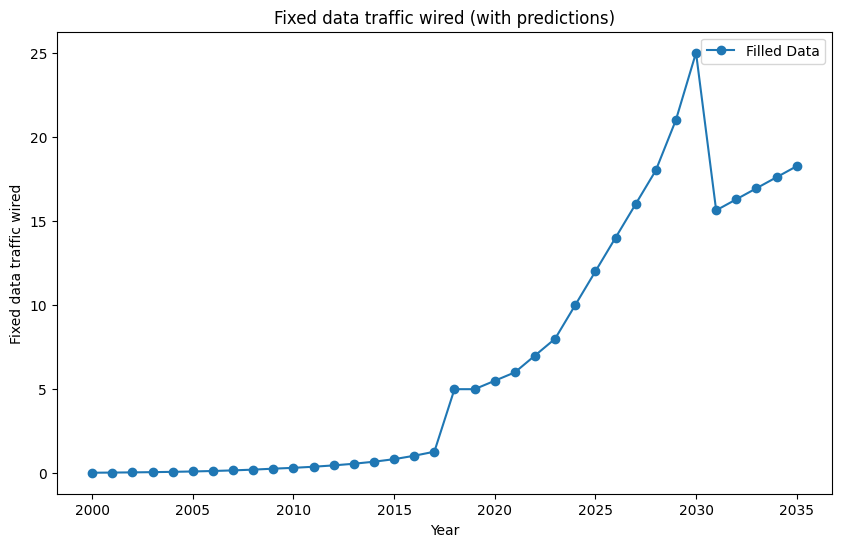


Filled DataFrame:
    Year  Fixed data traffic wired
0   2000                  0.034073
1   2001                  0.042968
2   2002                  0.054185
3   2003                  0.068329
4   2004                  0.086166
5   2005                  0.108659
6   2006                  0.137024
7   2007                  0.172793
8   2008                  0.217900
9   2009                  0.274781
10  2010                  0.325000
11  2011                  0.390000
12  2012                  0.470000
13  2013                  0.568000
14  2014                  0.689000
15  2015                  0.839000
16  2016                  1.043000
17  2017                  1.283000
18  2018                  5.000000
19  2019                  5.000000
20  2020                  5.500000
21  2021                  6.000000
22  2022                  7.000000
23  2023                  8.000000
24  2024                 10.000000
25  2025                 12.000000
26  2026                 14.000000
2

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Prepare the data
data = {
    "Year": np.arange(2000, 2036),
    "Fixed data traffic wired": [0.034073, 0.042968, 0.054185, 0.068329, 0.086166, 0.108659, 0.137024, 
                                 0.172793, 0.2179, 0.274781, 0.325, 0.39, 0.47, 0.568, 0.689, 0.839, 
                                 1.043, 1.283, 5, 5, 5.5, 6, 7, 8, 10, 12, 14, 16, 18, 21, 25, np.nan, np.nan, np.nan, np.nan, np.nan],
}

# Create DataFrame
df = pd.DataFrame(data)

# Plot the original data
plt.figure(figsize=(10, 6))
plt.plot(df['Year'], df['Fixed data traffic wired'], label='Original Data', marker='o')
plt.xlabel('Year')
plt.ylabel('Fixed data traffic wired')
plt.title('Fixed data traffic wired')
plt.legend()
plt.show()

# Split the data into known and missing
known_data = df.dropna()
missing_data = df[df.isna().any(axis=1)]

# Prepare the feature matrix X and target vector y for training
X = known_data[['Year']]
y = known_data['Fixed data traffic wired']

# Train regression models
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(),
    "Lasso Regression": Lasso(),
    "SVR": SVR()
}

results = {}
for name, model in models.items():
    # Split the known data into training and validation sets
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=21)
    
    # Train the model
    model.fit(X_train, y_train)
    
    # Validate the model
    y_pred_val = model.predict(X_val)
    mse = mean_squared_error(y_val, y_pred_val)
    results[name] = mse

# Print MSE for each model
print("Mean Squared Error for each model:")
for name, mse in results.items():
    print(f"{name}: {mse}")

# Select the best model (with the lowest MSE)
best_model_name = min(results, key=results.get)
best_model = models[best_model_name]
print(f"\nBest model: {best_model_name}")

# Train the best model on the entire known dataset
best_model.fit(X, y)

# Predict the missing values
X_missing = missing_data[['Year']]
y_missing_pred = best_model.predict(X_missing)

# Fill the missing values in the original dataframe
df.loc[df.isna().any(axis=1), 'Fixed data traffic wired'] = y_missing_pred

# Plot the filled data
plt.figure(figsize=(10, 6))
plt.plot(df['Year'], df['Fixed data traffic wired'], label='Filled Data', marker='o')
plt.xlabel('Year')
plt.ylabel('Fixed data traffic wired')
plt.title('Fixed data traffic wired (with predictions)')
plt.legend()
plt.show()

# Print the filled dataframe
print("\nFilled DataFrame:")
print(df)


# 3. Fillup column "Fixed data traffic in Wi-Fi" with datata

### a. Previous value prediction:

   Year  Predicted Fixed data traffic in Wi-Fi
0  2000                               0.009618
1  2001                               0.012756
2  2002                               0.016919
3  2003                               0.022440
4  2004                               0.029763
5  2005                               0.039475
6  2006                               0.052357
7  2007                               0.069442
8  2008                               0.092103
9  2009                               0.122158


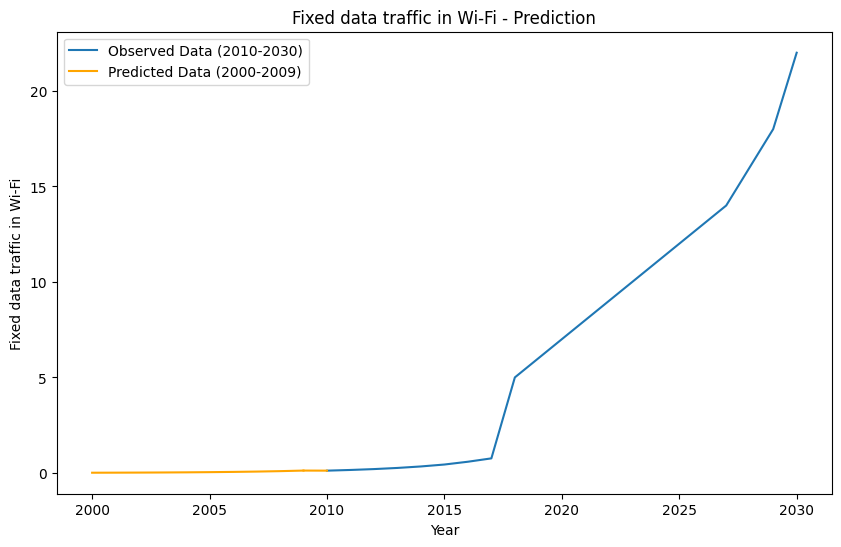

In [6]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

# Prepare the data
data = {
    "Year": np.arange(2010, 2031),
    "Fixed data traffic in Wi-Fi": [0.118, 0.154, 0.2, 0.26, 0.338, 0.439, 0.585, 0.761, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 16, 18, 22]
}

df = pd.DataFrame(data)

# Reverse the data for backcasting
df_reversed = df[::-1].reset_index(drop=True)

# Train a linear regression model
X = df_reversed['Year'].values.reshape(-1, 1)
y = np.log(df_reversed['Fixed data traffic in Wi-Fi'].values.reshape(-1, 1))

# Scale the features and target
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()

X_scaled = scaler_X.fit_transform(X)
y_scaled = scaler_y.fit_transform(y)

# Fit the linear regression model
model = LinearRegression()
model.fit(X_scaled, y_scaled)

# Predict for the years 2000 to 2009
years_to_predict = np.arange(2000, 2010).reshape(-1, 1)
years_to_predict_scaled = scaler_X.transform(years_to_predict)
predictions_scaled = model.predict(years_to_predict_scaled)
predictions_log = scaler_y.inverse_transform(predictions_scaled)
predictions = np.exp(predictions_log)

# Print the predicted values
predicted_values = pd.DataFrame({
    "Year": years_to_predict.flatten(),
    "Predicted Fixed data traffic in Wi-Fi": predictions.flatten()
})
print(predicted_values)

# Plot the results
plt.figure(figsize=(10, 6))

plt.plot(df['Year'], df['Fixed data traffic in Wi-Fi'], label='Observed Data (2010-2030)')
plt.plot([predicted_values['Year'].iloc[-1], df['Year'].iloc[0]], [predicted_values['Predicted Fixed data traffic in Wi-Fi'].iloc[-1], df['Fixed data traffic in Wi-Fi'].iloc[0]], color='orange')
plt.plot(predicted_values['Year'], predicted_values['Predicted Fixed data traffic in Wi-Fi'], label='Predicted Data (2000-2009)', color='orange')

plt.title('Fixed data traffic in Wi-Fi - Prediction')
plt.xlabel('Year')
plt.ylabel('Fixed data traffic in Wi-Fi')
plt.legend()
plt.show()


### b. Future value prediction:

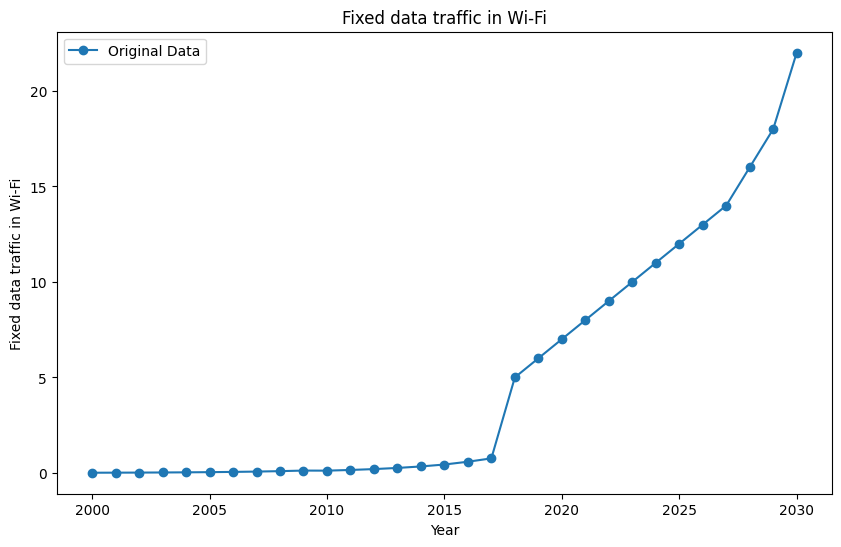

Mean Squared Error for each model:
Linear Regression: 4.6615779225592116
Ridge Regression: 4.660808273416281
Lasso Regression: 4.650139062277541
SVR: 15.991613461693529

Best model: Lasso Regression


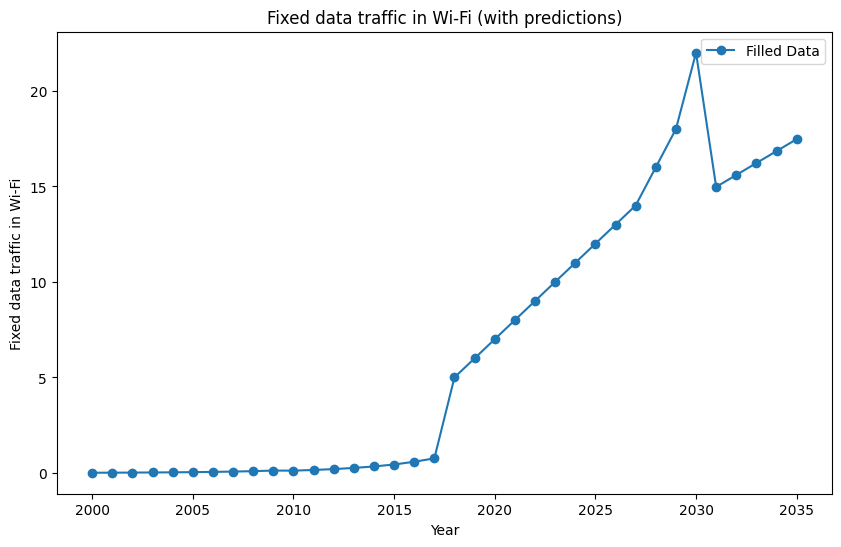


Filled DataFrame:
    Year  Fixed data traffic in Wi-Fi
0   2000                     0.009618
1   2001                     0.012756
2   2002                     0.016919
3   2003                     0.022440
4   2004                     0.029763
5   2005                     0.039475
6   2006                     0.052357
7   2007                     0.069442
8   2008                     0.092103
9   2009                     0.122158
10  2010                     0.118000
11  2011                     0.154000
12  2012                     0.200000
13  2013                     0.260000
14  2014                     0.338000
15  2015                     0.439000
16  2016                     0.585000
17  2017                     0.761000
18  2018                     5.000000
19  2019                     6.000000
20  2020                     7.000000
21  2021                     8.000000
22  2022                     9.000000
23  2023                    10.000000
24  2024                    11.

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Prepare the data
data = {
    "Year": np.arange(2000, 2036),
    "Fixed data traffic in Wi-Fi": [0.009618, 0.012756, 0.016919, 0.02244, 0.029763, 0.039475, 0.052357, 0.069442, 
                                    0.092103, 0.122158, 0.118, 0.154, 0.2, 0.26, 0.338, 0.439, 0.585, 0.761, 5, 6, 7, 8, 
                                    9, 10, 11, 12, 13, 14, 16, 18, 22, np.nan, np.nan, np.nan, np.nan, np.nan],
}

# Create DataFrame
df = pd.DataFrame(data)

# Plot the original data
plt.figure(figsize=(10, 6))
plt.plot(df['Year'], df['Fixed data traffic in Wi-Fi'], label='Original Data', marker='o')
plt.xlabel('Year')
plt.ylabel('Fixed data traffic in Wi-Fi')
plt.title('Fixed data traffic in Wi-Fi')
plt.legend()
plt.show()

# Split the data into known and missing
known_data = df.dropna()
missing_data = df[df.isna().any(axis=1)]

# Prepare the feature matrix X and target vector y for training
X = known_data[['Year']]
y = known_data['Fixed data traffic in Wi-Fi']

# Train regression models
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(),
    "Lasso Regression": Lasso(),
    "SVR": SVR()
}

results = {}
for name, model in models.items():
    # Split the known data into training and validation sets
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=21)
    
    # Train the model
    model.fit(X_train, y_train)
    
    # Validate the model
    y_pred_val = model.predict(X_val)
    mse = mean_squared_error(y_val, y_pred_val)
    results[name] = mse

# Print MSE for each model
print("Mean Squared Error for each model:")
for name, mse in results.items():
    print(f"{name}: {mse}")

# Select the best model (with the lowest MSE)
best_model_name = min(results, key=results.get)
best_model = models[best_model_name]
print(f"\nBest model: {best_model_name}")

# Train the best model on the entire known dataset
best_model.fit(X, y)

# Predict the missing values
X_missing = missing_data[['Year']]
y_missing_pred = best_model.predict(X_missing)

# Fill the missing values in the original dataframe
df.loc[df.isna().any(axis=1), 'Fixed data traffic in Wi-Fi'] = y_missing_pred

# Plot the filled data
plt.figure(figsize=(10, 6))
plt.plot(df['Year'], df['Fixed data traffic in Wi-Fi'], label='Filled Data', marker='o')
plt.xlabel('Year')
plt.ylabel('Fixed data traffic in Wi-Fi')
plt.title('Fixed data traffic in Wi-Fi (with predictions)')
plt.legend()
plt.show()

# Print the filled dataframe
print("\nFilled DataFrame:")
print(df)


# 4. Fillup column "Mobile Network's Electricity Usage" with data

### a. Previous value predictions:

   Year  Predicted Mobile Networks Electricity Usage
0  2000                                    83.737788
1  2001                                    87.933796
2  2002                                    92.340063
3  2003                                    96.967122
4  2004                                   101.826039
5  2005                                   106.928430
6  2006                                   112.286497
7  2007                                   117.913050
8  2008                                   123.821544
9  2009                                   130.026106


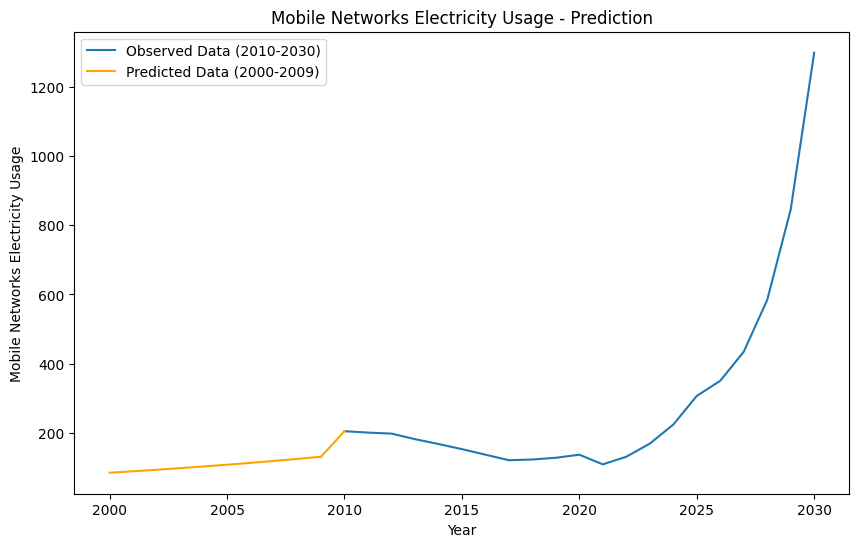

In [8]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

# Prepare the data
data = {
    "Year": np.arange(2010, 2031),
    "Mobile Networks Electricity Usage": [204, 200, 197, 181, 167, 152, 136, 120, 122, 127, 136, 108, 130, 168, 223, 306, 350, 434, 584, 846, 1300]
}

df = pd.DataFrame(data)

# Reverse the data for backcasting
df_reversed = df[::-1].reset_index(drop=True)

# Train a linear regression model
X = df_reversed['Year'].values.reshape(-1, 1)
y = np.log(df_reversed["Mobile Networks Electricity Usage"].values.reshape(-1, 1))

# Scale the features and target
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()

X_scaled = scaler_X.fit_transform(X)
y_scaled = scaler_y.fit_transform(y)

# Fit the linear regression model
model = Ridge()
model.fit(X_scaled, y_scaled.ravel())

# Predict for the years 2000 to 2009
years_to_predict = np.arange(2000, 2010).reshape(-1, 1)
years_to_predict_scaled = scaler_X.transform(years_to_predict)
predictions_scaled = model.predict(years_to_predict_scaled).reshape(-1, 1)
predictions_log = scaler_y.inverse_transform(predictions_scaled)
predictions = np.exp(predictions_log)

# Print the predicted values
predicted_values = pd.DataFrame({
    "Year": years_to_predict.flatten(),
    "Predicted Mobile Networks Electricity Usage": predictions.flatten()
})
print(predicted_values)

# Plot the results
plt.figure(figsize=(10, 6))

plt.plot(df['Year'], df['Mobile Networks Electricity Usage'], label='Observed Data (2010-2030)')
plt.plot([predicted_values['Year'].iloc[-1], df['Year'].iloc[0]], [predicted_values['Predicted Mobile Networks Electricity Usage'].iloc[-1], df['Mobile Networks Electricity Usage'].iloc[0]], color='orange')
plt.plot(predicted_values['Year'], predicted_values['Predicted Mobile Networks Electricity Usage'], label='Predicted Data (2000-2009)', color='orange')

plt.title("Mobile Networks Electricity Usage - Prediction")
plt.xlabel('Year')
plt.ylabel("Mobile Networks Electricity Usage")
plt.legend()
plt.show()


### b. Future value prediction:

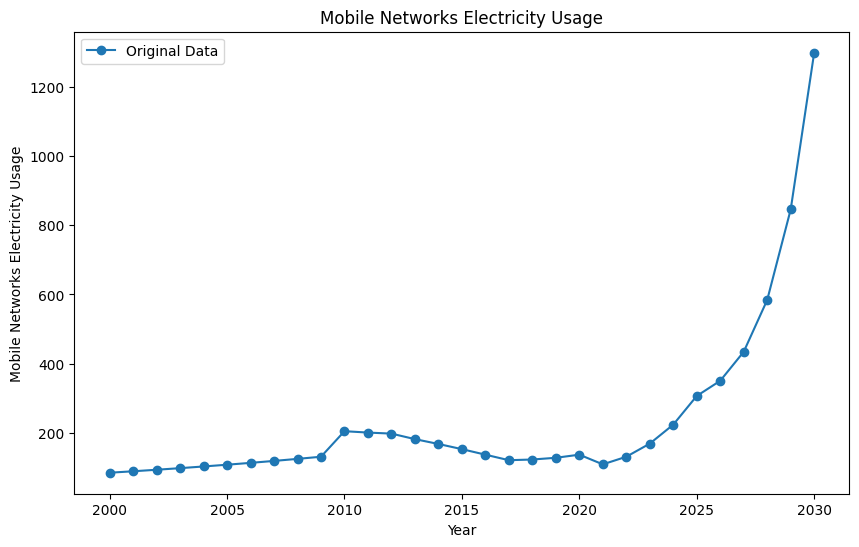

Mean Squared Error for each model:
Linear Regression: 38212.64481715421
Ridge Regression: 38196.87466950265
Lasso Regression: 38196.30963764783
SVR: 53672.84349424103

Best model: Lasso Regression


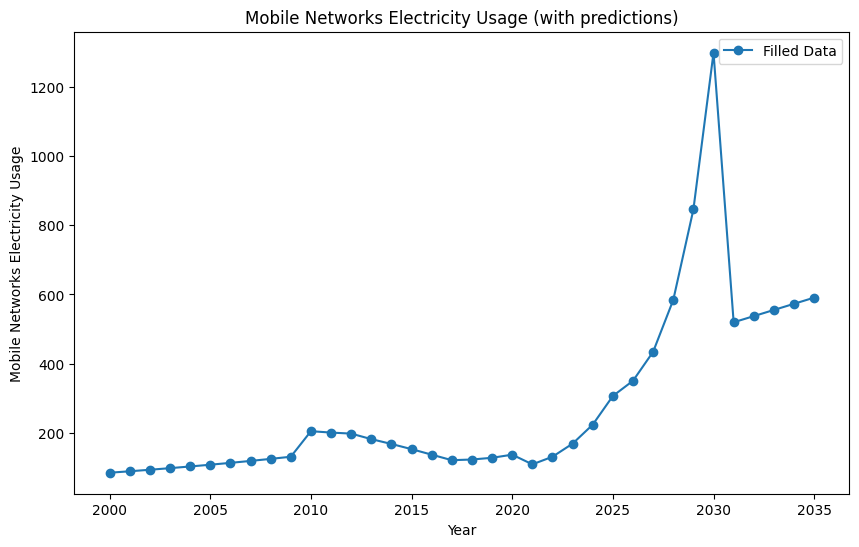


Filled DataFrame:
    Year  Mobile Networks Electricity Usage
0   2000                          83.737788
1   2001                          87.933796
2   2002                          92.340063
3   2003                          96.967122
4   2004                         101.826039
5   2005                         106.928430
6   2006                         112.286497
7   2007                         117.913050
8   2008                         123.821544
9   2009                         130.026106
10  2010                         204.000000
11  2011                         200.000000
12  2012                         197.000000
13  2013                         181.000000
14  2014                         167.000000
15  2015                         152.000000
16  2016                         136.000000
17  2017                         120.000000
18  2018                         122.000000
19  2019                         127.000000
20  2020                         136.000000
21  2021     

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Prepare the data
data = {
    "Year": np.arange(2000, 2036),
    "Mobile Networks Electricity Usage": [83.737788, 87.933796, 92.340063, 96.967122, 101.826039, 106.92843, 112.286497, 
                                          117.91305, 123.821544, 130.026106, 204, 200, 197, 181, 167, 152, 136, 120, 122, 
                                          127, 136, 108, 130, 168, 223, 306, 350, 434, 584, 846, 1300, np.nan, np.nan, np.nan, np.nan, np.nan],
}

# Create DataFrame
df = pd.DataFrame(data)

# Plot the original data
plt.figure(figsize=(10, 6))
plt.plot(df['Year'], df['Mobile Networks Electricity Usage'], label='Original Data', marker='o')
plt.xlabel('Year')
plt.ylabel('Mobile Networks Electricity Usage')
plt.title('Mobile Networks Electricity Usage')
plt.legend()
plt.show()

# Split the data into known and missing
known_data = df.dropna()
missing_data = df[df.isna().any(axis=1)]

# Prepare the feature matrix X and target vector y for training
X = known_data[['Year']]
y = known_data['Mobile Networks Electricity Usage']

# Train regression models
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(),
    "Lasso Regression": Lasso(),
    "SVR": SVR()
}

results = {}
for name, model in models.items():
    # Split the known data into training and validation sets
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=21)
    
    # Train the model
    model.fit(X_train, y_train)
    
    # Validate the model
    y_pred_val = model.predict(X_val)
    mse = mean_squared_error(y_val, y_pred_val)
    results[name] = mse

# Print MSE for each model
print("Mean Squared Error for each model:")
for name, mse in results.items():
    print(f"{name}: {mse}")

# Select the best model (with the lowest MSE)
best_model_name = min(results, key=results.get)
best_model = models[best_model_name]
print(f"\nBest model: {best_model_name}")

# Train the best model on the entire known dataset
best_model.fit(X, y)

# Predict the missing values
X_missing = missing_data[['Year']]
y_missing_pred = best_model.predict(X_missing)

# Fill the missing values in the original dataframe
df.loc[df.isna().any(axis=1), 'Mobile Networks Electricity Usage'] = y_missing_pred

# Plot the filled data
plt.figure(figsize=(10, 6))
plt.plot(df['Year'], df['Mobile Networks Electricity Usage'], label='Filled Data', marker='o')
plt.xlabel('Year')
plt.ylabel('Mobile Networks Electricity Usage')
plt.title('Mobile Networks Electricity Usage (with predictions)')
plt.legend()
plt.show()

# Print the filled dataframe
print("\nFilled DataFrame:")
print(df)


# 5. Fillup column "Fixed access wired Electricity Usage" with datata

### a. Previous value predictions:

   Year  Predicted Fixed access wired Electricity Usage
0  2000                                       75.865952
1  2001                                       81.000065
2  2002                                       86.481622
3  2003                                       92.334135
4  2004                                       98.582707
5  2005                                      105.254143
6  2006                                      112.377057
7  2007                                      119.982005
8  2008                                      128.101605
9  2009                                      136.770687


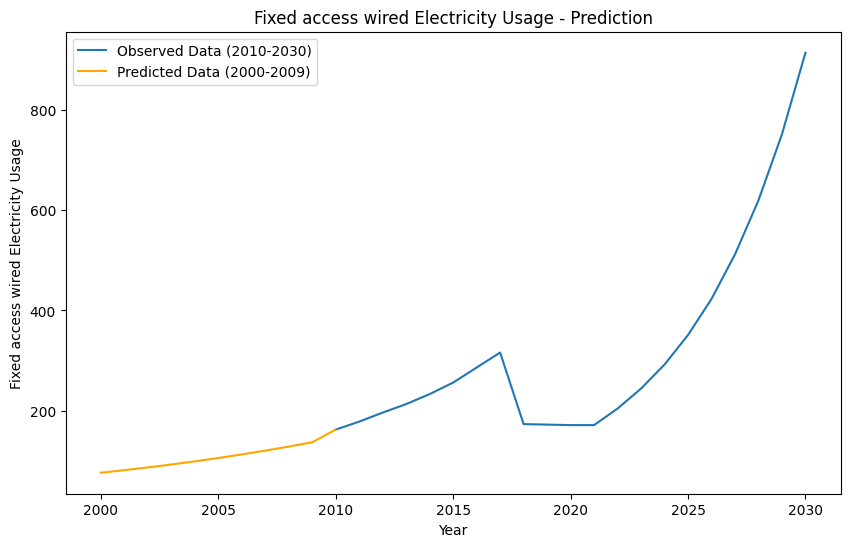

[ 75.86595155  81.00006496  86.48162172  92.33413453  98.58270728
 105.25414274 112.37705749 119.98200471 128.10160522 136.77068741]


In [10]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

# Prepare the data
data = {
    "Year": np.arange(2010, 2031),
    "Fixed access wired Electricity Usage": [162, 178, 196, 213, 233, 256, 286, 316, 173, 172,  171, 171, 204, 244, 292, 351, 423, 512, 620, 752, 915]
}

df = pd.DataFrame(data)

# Reverse the data for backcasting
df_reversed = df[::-1].reset_index(drop=True)

# Train a linear regression model
X = df_reversed['Year'].values.reshape(-1, 1)
y = np.log(df_reversed["Fixed access wired Electricity Usage"].values.reshape(-1, 1))

# Scale the features and target
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()

X_scaled = scaler_X.fit_transform(X)
y_scaled = scaler_y.fit_transform(y)

# Fit the linear regression model
model = LinearRegression()
model.fit(X_scaled, y_scaled.ravel())

# Predict for the years 2000 to 2009
years_to_predict = np.arange(2000, 2010).reshape(-1, 1)
years_to_predict_scaled = scaler_X.transform(years_to_predict)
predictions_scaled = model.predict(years_to_predict_scaled).reshape(-1, 1)
predictions_log = scaler_y.inverse_transform(predictions_scaled)
predictions = np.exp(predictions_log)

# Print the predicted values
predicted_values = pd.DataFrame({
    "Year": years_to_predict.flatten(),
    "Predicted Fixed access wired Electricity Usage": predictions.flatten()
})
print(predicted_values)

# Plot the results
plt.figure(figsize=(10, 6))

plt.plot(df['Year'], df['Fixed access wired Electricity Usage'], label='Observed Data (2010-2030)')
plt.plot([predicted_values['Year'].iloc[-1], df['Year'].iloc[0]], [predicted_values['Predicted Fixed access wired Electricity Usage'].iloc[-1], df['Fixed access wired Electricity Usage'].iloc[0]], color='orange')
plt.plot(predicted_values['Year'], predicted_values['Predicted Fixed access wired Electricity Usage'], label='Predicted Data (2000-2009)', color='orange')

plt.title("Fixed access wired Electricity Usage - Prediction")
plt.xlabel('Year')
plt.ylabel("Fixed access wired Electricity Usage")
plt.legend()
plt.show()


print(predicted_values["Predicted Fixed access wired Electricity Usage"].values)

### b. Future value predictions:

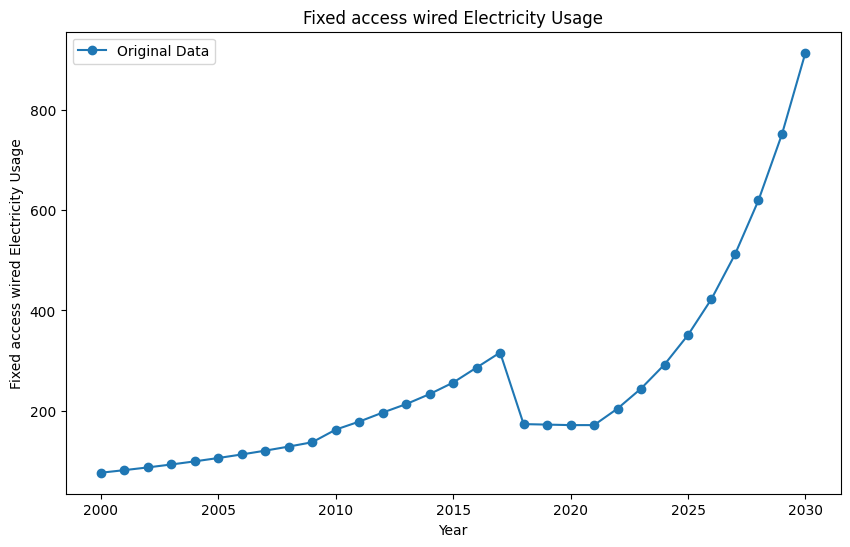

Mean Squared Error for each model:
Linear Regression: 21998.414139139793
Ridge Regression: 21986.88164941706
Lasso Regression: 21985.903225120353
SVR: 35424.711151815674

Best model: Lasso Regression


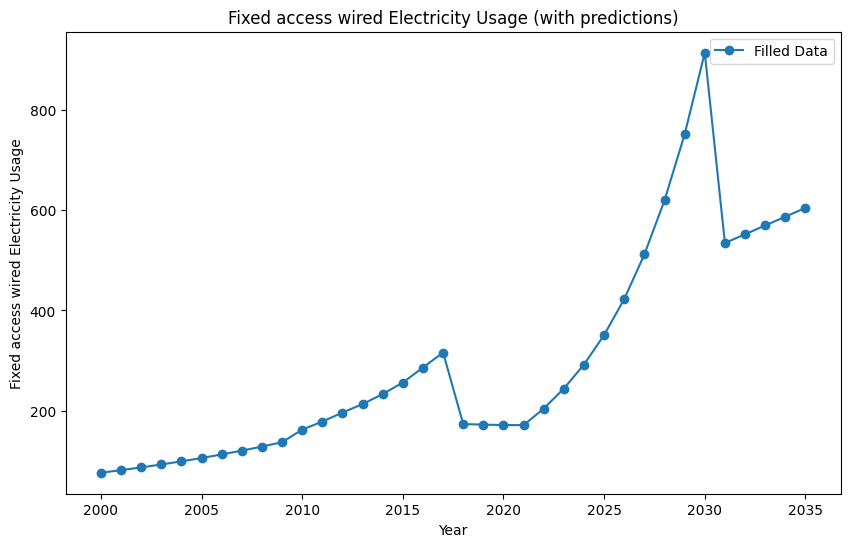


Filled DataFrame:
    Year  Fixed access wired Electricity Usage
0   2000                             75.865952
1   2001                             81.000065
2   2002                             86.481622
3   2003                             92.334135
4   2004                             98.582707
5   2005                            105.254143
6   2006                            112.377058
7   2007                            119.982005
8   2008                            128.101605
9   2009                            136.770687
10  2010                            162.000000
11  2011                            178.000000
12  2012                            196.000000
13  2013                            213.000000
14  2014                            233.000000
15  2015                            256.000000
16  2016                            286.000000
17  2017                            316.000000
18  2018                            173.000000
19  2019                            172.0

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Prepare the data
data = {
    "Year": np.arange(2000, 2036),
    "Fixed access wired Electricity Usage": [75.86595155, 81.00006496, 86.48162172, 92.33413453, 98.58270728, 105.2541427, 
                                             112.3770575, 119.9820047, 128.1016052, 136.7706874, 162, 178, 196, 213, 233, 
                                             256, 286, 316, 173, 172,  171, 171, 204, 244, 292, 351, 423, 512, 620, 752, 915, 
                                             np.nan, np.nan, np.nan, np.nan, np.nan],
}

# Create DataFrame
df = pd.DataFrame(data)

# Plot the original data
plt.figure(figsize=(10, 6))
plt.plot(df['Year'], df['Fixed access wired Electricity Usage'], label='Original Data', marker='o')
plt.xlabel('Year')
plt.ylabel('Fixed access wired Electricity Usage')
plt.title('Fixed access wired Electricity Usage')
plt.legend()
plt.show()

# Split the data into known and missing
known_data = df.dropna()
missing_data = df[df.isna().any(axis=1)]

# Prepare the feature matrix X and target vector y for training
X = known_data[['Year']]
y = known_data['Fixed access wired Electricity Usage']

# Train regression models
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(),
    "Lasso Regression": Lasso(),
    "SVR": SVR()
}

results = {}
for name, model in models.items():
    # Split the known data into training and validation sets
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=21)
    
    # Train the model
    model.fit(X_train, y_train)
    
    # Validate the model
    y_pred_val = model.predict(X_val)
    mse = mean_squared_error(y_val, y_pred_val)
    results[name] = mse

# Print MSE for each model
print("Mean Squared Error for each model:")
for name, mse in results.items():
    print(f"{name}: {mse}")

# Select the best model (with the lowest MSE)
best_model_name = min(results, key=results.get)
best_model = models[best_model_name]
print(f"\nBest model: {best_model_name}")

# Train the best model on the entire known dataset
best_model.fit(X, y)

# Predict the missing values
X_missing = missing_data[['Year']]
y_missing_pred = best_model.predict(X_missing)

# Fill the missing values in the original dataframe
df.loc[df.isna().any(axis=1), 'Fixed access wired Electricity Usage'] = y_missing_pred

# Plot the filled data
plt.figure(figsize=(10, 6))
plt.plot(df['Year'], df['Fixed access wired Electricity Usage'], label='Filled Data', marker='o')
plt.xlabel('Year')
plt.ylabel('Fixed access wired Electricity Usage')
plt.title('Fixed access wired Electricity Usage (with predictions)')
plt.legend()
plt.show()

# Print the filled dataframe
print("\nFilled DataFrame:")
print(df)


# 6. Fillup column "Fixed access Wi-Fi Electricity Usage" with datata

### a. Previous value prediction:

   Year  Predicted Fixed access Wi-Fi Electricity Usage
0  2000                                       13.129959
1  2001                                       14.611116
2  2002                                       16.259358
3  2003                                       18.093534
4  2004                                       20.134618
5  2005                                       22.405952
6  2006                                       24.933510
7  2007                                       27.746194
8  2008                                       30.876171
9  2009                                       34.359231


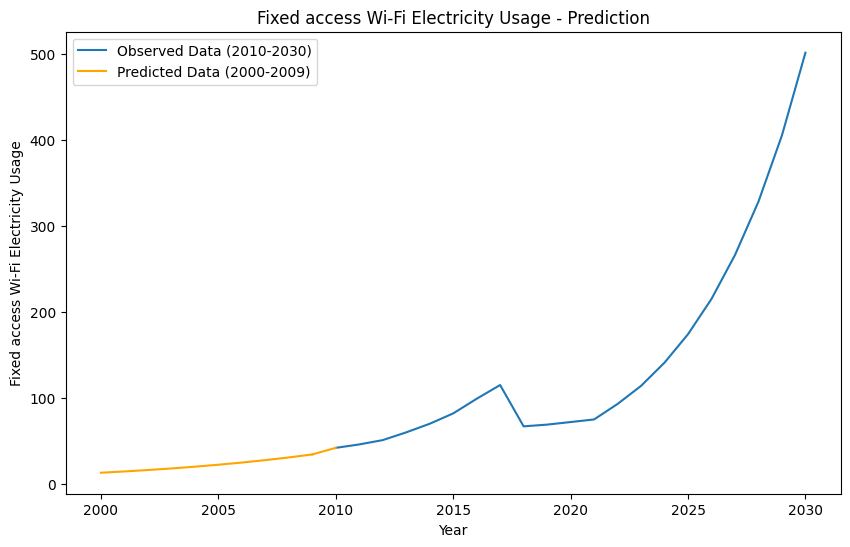

In [12]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

# Prepare the data
data = {
    "Year": np.arange(2010, 2031),
    "Fixed access Wi-Fi Electricity Usage": [42, 46, 51, 60, 70, 82, 99, 115, 67, 69, 72, 75, 93, 114, 141, 174, 215, 266, 328, 405, 501]
}

df = pd.DataFrame(data)

# Reverse the data for backcasting
df_reversed = df[::-1].reset_index(drop=True)

# Train a linear regression model
X = df_reversed['Year'].values.reshape(-1, 1)
y = np.log(df_reversed["Fixed access Wi-Fi Electricity Usage"].values.reshape(-1, 1))

# Scale the features and target
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()

X_scaled = scaler_X.fit_transform(X)
y_scaled = scaler_y.fit_transform(y)

# Fit the linear regression model
model = LinearRegression()
model.fit(X_scaled, y_scaled.ravel())

# Predict for the years 2000 to 2009
years_to_predict = np.arange(2000, 2010).reshape(-1, 1)
years_to_predict_scaled = scaler_X.transform(years_to_predict)
predictions_scaled = model.predict(years_to_predict_scaled).reshape(-1, 1)
predictions_log = scaler_y.inverse_transform(predictions_scaled)
predictions = np.exp(predictions_log)

# Print the predicted values
predicted_values = pd.DataFrame({
    "Year": years_to_predict.flatten(),
    "Predicted Fixed access Wi-Fi Electricity Usage": predictions.flatten()
})
print(predicted_values)

# Plot the results
plt.figure(figsize=(10, 6))

plt.plot(df['Year'], df['Fixed access Wi-Fi Electricity Usage'], label='Observed Data (2010-2030)')
plt.plot([predicted_values['Year'].iloc[-1], df['Year'].iloc[0]], [predicted_values['Predicted Fixed access Wi-Fi Electricity Usage'].iloc[-1], df['Fixed access Wi-Fi Electricity Usage'].iloc[0]], color='orange')
plt.plot(predicted_values['Year'], predicted_values['Predicted Fixed access Wi-Fi Electricity Usage'], label='Predicted Data (2000-2009)', color='orange')

plt.title("Fixed access Wi-Fi Electricity Usage - Prediction")
plt.xlabel('Year')
plt.ylabel("Fixed access Wi-Fi Electricity Usage")
plt.legend()
plt.show()


### b. Future value predictions:

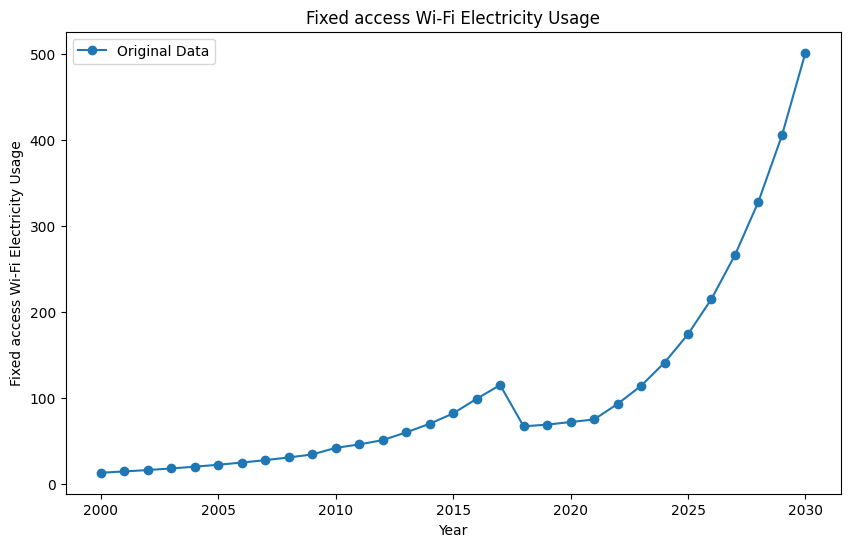

Mean Squared Error for each model:
Linear Regression: 6418.395645335406
Ridge Regression: 6414.955528123083
Lasso Regression: 6412.1327953916325
SVR: 13077.474257308304

Best model: Lasso Regression


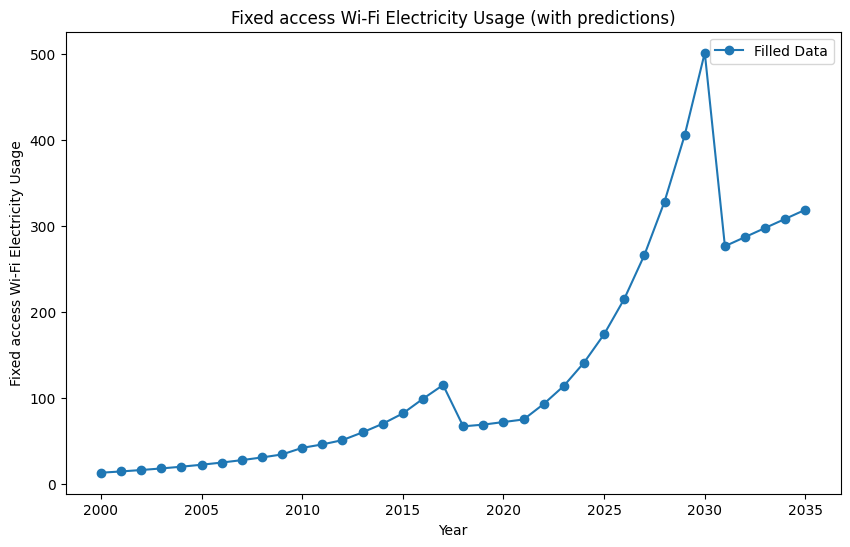


Filled DataFrame:
    Year  Fixed access Wi-Fi Electricity Usage
0   2000                             13.129959
1   2001                             14.611116
2   2002                             16.259358
3   2003                             18.093534
4   2004                             20.134618
5   2005                             22.405952
6   2006                             24.933510
7   2007                             27.746194
8   2008                             30.876171
9   2009                             34.359231
10  2010                             42.000000
11  2011                             46.000000
12  2012                             51.000000
13  2013                             60.000000
14  2014                             70.000000
15  2015                             82.000000
16  2016                             99.000000
17  2017                            115.000000
18  2018                             67.000000
19  2019                             69.0

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Prepare the data
data = {
    "Year": np.arange(2000, 2036),
    "Fixed access Wi-Fi Electricity Usage": [13.129959, 14.611116, 16.259358, 18.093534, 20.134618, 22.405952, 
                                             24.93351, 27.746194, 30.876171, 34.359231, 42, 46, 51, 60, 70, 82, 
                                             99, 115, 67, 69, 72, 75, 93, 114, 141, 174, 215, 266, 328, 405, 501, 
                                             np.nan, np.nan, np.nan, np.nan, np.nan],
}

# Create DataFrame
df = pd.DataFrame(data)

# Plot the original data
plt.figure(figsize=(10, 6))
plt.plot(df['Year'], df['Fixed access Wi-Fi Electricity Usage'], label='Original Data', marker='o')
plt.xlabel('Year')
plt.ylabel('Fixed access Wi-Fi Electricity Usage')
plt.title('Fixed access Wi-Fi Electricity Usage')
plt.legend()
plt.show()

# Split the data into known and missing
known_data = df.dropna()
missing_data = df[df.isna().any(axis=1)]

# Prepare the feature matrix X and target vector y for training
X = known_data[['Year']]
y = known_data['Fixed access Wi-Fi Electricity Usage']

# Train regression models
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(),
    "Lasso Regression": Lasso(),
    "SVR": SVR()
}

results = {}
for name, model in models.items():
    # Split the known data into training and validation sets
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=21)
    
    # Train the model
    model.fit(X_train, y_train)
    
    # Validate the model
    y_pred_val = model.predict(X_val)
    mse = mean_squared_error(y_val, y_pred_val)
    results[name] = mse

# Print MSE for each model
print("Mean Squared Error for each model:")
for name, mse in results.items():
    print(f"{name}: {mse}")

# Select the best model (with the lowest MSE)
best_model_name = min(results, key=results.get)
best_model = models[best_model_name]
print(f"\nBest model: {best_model_name}")

# Train the best model on the entire known dataset
best_model.fit(X, y)

# Predict the missing values
X_missing = missing_data[['Year']]
y_missing_pred = best_model.predict(X_missing)

# Fill the missing values in the original dataframe
df.loc[df.isna().any(axis=1), 'Fixed access Wi-Fi Electricity Usage'] = y_missing_pred

# Plot the filled data
plt.figure(figsize=(10, 6))
plt.plot(df['Year'], df['Fixed access Wi-Fi Electricity Usage'], label='Filled Data', marker='o')
plt.xlabel('Year')
plt.ylabel('Fixed access Wi-Fi Electricity Usage')
plt.title('Fixed access Wi-Fi Electricity Usage (with predictions)')
plt.legend()
plt.show()

# Print the filled dataframe
print("\nFilled DataFrame:")
print(df)


# 7. Fillup column "Network Electricity Usage":

In [11]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Data provided
data = {
    "Year": np.arange(2000, 2031),
    "Mobile Network's Electricity Usage": [83.737788, 87.933796, 92.340063, 96.967122, 101.826039, 106.92843, 112.286497, 117.91305, 123.821544, 130.026106, 204, 200, 197, 181, 167, 152, 136, 120, 122, 127, 136, 108, 130, 168, 223, 306, 350, 434, 584, 846, 1300],
    "Fixed access wired Electricity Usage": [75.86595155, 81.00006496, 86.48162172, 92.33413453, 98.58270728, 105.2541427, 112.3770575, 119.9820047, 128.1016052, 136.7706874, 162, 178, 196, 213, 233, 256, 286, 316, 173, 172,  171, 171, 204, 244, 292, 351, 423, 512, 620, 752, 915],
    "Fixed access Wi-Fi Electricity Usage": [13.129959, 14.611116, 16.259358, 18.093534, 20.134618, 22.405952, 24.93351, 27.746194, 30.876171, 34.359231, 42, 46, 51, 60, 70, 82, 99, 115, 67, 69, 72, 75, 93, 114, 141, 174, 215, 266, 328, 405, 501],
    "Network Electricity Usage": [np.nan,  np.nan, 178,  np.nan,  np.nan,  np.nan,  np.nan, 203, 219,  np.nan, 185, 220, 334, 454, 470, 247, 521, 551, 362, 368, 379, 354, 427, 526, 656, 831, 988, 1212, 1532, 2003, 2716],
}

# Create DataFrame
df = pd.DataFrame(data)

# Prepare the feature matrix X and target vector y
X = df[["Mobile Network's Electricity Usage", "Fixed access wired Electricity Usage", "Fixed access Wi-Fi Electricity Usage"]]
y = df["Network Electricity Usage"]

# Handle missing values in y by dropping those rows
df = df.dropna(subset=["Network Electricity Usage"])
X = df[["Mobile Network's Electricity Usage", "Fixed access wired Electricity Usage", "Fixed access Wi-Fi Electricity Usage"]]
y = df["Network Electricity Usage"]

# Split the data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Gradient Boosting Regressor
model = Lasso()
model.fit(X, y)

# Predict on the test set
y_pred = model.predict(X)

# Evaluate the model
mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

# Predict missing values
df_full = pd.DataFrame(data)
nan_emission_df = df_full[df_full["Network Electricity Usage"].isna()]

X_nan = nan_emission_df[["Mobile Network's Electricity Usage", "Fixed access wired Electricity Usage", "Fixed access Wi-Fi Electricity Usage"]]
y_nan_pred = model.predict(X_nan)

print("Predicted missing values:", y_nan_pred)

# Update DataFrame with predictions
#df_full.loc[df_full["Network emission (Mt CO2e)"].isna(), "Network emission (Mt CO2e)"] = y_nan_pred
#print(df_full)


Mean Squared Error: 3504.4066218228995
R^2 Score: 0.9907501907657648
Predicted missing values: [118.25017944 126.50863919 145.29604197 155.9775012  167.63271874
 180.35965858 226.11393013]


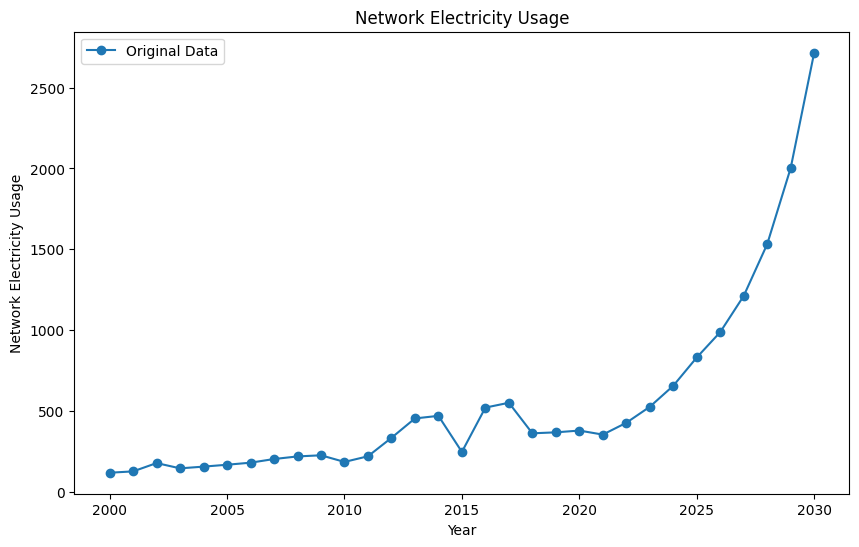

Mean Squared Error for each model:
Linear Regression: 171323.68410859775
Ridge Regression: 171239.13739298075
Lasso Regression: 171290.8541819666
SVR: 306085.2072056773

Best model: Ridge Regression


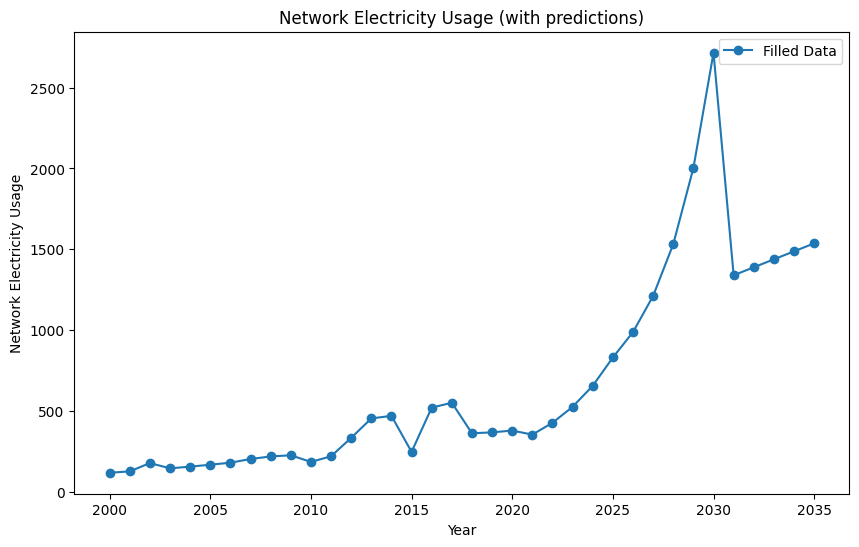


Filled DataFrame:
    Year  Network Electricity Usage
0   2000                 118.250179
1   2001                 126.508639
2   2002                 178.000000
3   2003                 145.296042
4   2004                 155.977501
5   2005                 167.632719
6   2006                 180.359659
7   2007                 203.000000
8   2008                 219.000000
9   2009                 226.113930
10  2010                 185.000000
11  2011                 220.000000
12  2012                 334.000000
13  2013                 454.000000
14  2014                 470.000000
15  2015                 247.000000
16  2016                 521.000000
17  2017                 551.000000
18  2018                 362.000000
19  2019                 368.000000
20  2020                 379.000000
21  2021                 354.000000
22  2022                 427.000000
23  2023                 526.000000
24  2024                 656.000000
25  2025                 831.000000
26  2026 

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Prepare the data
data = {
    "Year": np.arange(2000, 2036),
    "Network Electricity Usage": [118.2501794,  126.5086392, 178, 145.296042,  155.9775012, 167.6327187, 180.3596586, 203, 
                                  219, 226.1139301, 185, 220, 334, 454, 470, 247, 521, 551, 362, 368, 379, 354, 427, 526, 
                                  656, 831, 988, 1212, 1532, 2003, 2716, np.nan, np.nan, np.nan, np.nan, np.nan],
}

# Create DataFrame
df = pd.DataFrame(data)

# Plot the original data
plt.figure(figsize=(10, 6))
plt.plot(df['Year'], df['Network Electricity Usage'], label='Original Data', marker='o')
plt.xlabel('Year')
plt.ylabel('Network Electricity Usage')
plt.title('Network Electricity Usage')
plt.legend()
plt.show()

# Split the data into known and missing
known_data = df.dropna()
missing_data = df[df.isna().any(axis=1)]

# Prepare the feature matrix X and target vector y for training
X = known_data[['Year']]
y = known_data['Network Electricity Usage']

# Train regression models
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(),
    "Lasso Regression": Lasso(),
    "SVR": SVR()
}

results = {}
for name, model in models.items():
    # Split the known data into training and validation sets
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=21)
    
    # Train the model
    model.fit(X_train, y_train)
    
    # Validate the model
    y_pred_val = model.predict(X_val)
    mse = mean_squared_error(y_val, y_pred_val)
    results[name] = mse

# Print MSE for each model
print("Mean Squared Error for each model:")
for name, mse in results.items():
    print(f"{name}: {mse}")

# Select the best model (with the lowest MSE)
best_model_name = min(results, key=results.get)
best_model = models[best_model_name]
print(f"\nBest model: {best_model_name}")

# Train the best model on the entire known dataset
best_model.fit(X, y)

# Predict the missing values
X_missing = missing_data[['Year']]
y_missing_pred = best_model.predict(X_missing)

# Fill the missing values in the original dataframe
df.loc[df.isna().any(axis=1), 'Network Electricity Usage'] = y_missing_pred

# Plot the filled data
plt.figure(figsize=(10, 6))
plt.plot(df['Year'], df['Network Electricity Usage'], label='Filled Data', marker='o')
plt.xlabel('Year')
plt.ylabel('Network Electricity Usage')
plt.title('Network Electricity Usage (with predictions)')
plt.legend()
plt.show()

# Print the filled dataframe
print("\nFilled DataFrame:")
print(df)


# 8. Fillup column "Network emission (Mt CO2e)" with other independent values 

In [19]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Data provided
data = {
    "Year": np.arange(2000, 2031),
    #"Global GHG Emission": [40.77, 40.61, 41.55, 43.61, 44.33, 44.95, 46.47, 46.78, 47.58, 47.49, 49.42, 50.94, 51.71, 51.46, 52.16, 52.56, 51.55, 52.25, 52.82, 53.46, 51.46, 53.45, 53.85, 60.3, 61.7, 63.1, 64.6, 66.2, 67.9, 69.7, 71.7],
    #"Global Electricity": [13261, 13393, 13839, 14384, 15027, 15681, 16327, 17133, 17443, 17353, 18753, 19444, 19924, 20578, 20987, 21405, 22028, 22722, 23536, 23921, 23966, 25343, 25530, 29035, 30158, 31375, 32693, 34150, 35767, 37571, 39594],
    "Mobile and Voice Traffic": [0.000087, 0.000139, 0.000222, 0.000353, 0.000562, 0.000895, 0.001424, 0.002268, 0.003612, 0.005751, 0.023, 0.025, 0.03, 0.038, 0.052, 0.075, 0.108, 0.153, 0.25, 0.44, 0.77, 0.94, 2, 3, 5, 9, 17, 30, 54, 97, 174],
    "Fixed data traffic wired": [0.034073, 0.042968, 0.054185, 0.068329, 0.086166, 0.108659, 0.137024, 0.172793, 0.2179, 0.274781, 0.325, 0.39, 0.47, 0.568, 0.689, 0.839, 1.043, 1.283, 5, 5, 5.5, 6, 7, 8, 10, 12, 14, 16, 18, 21, 25],
    "Fixed data traffic in Wi-Fi": [0.009618, 0.012756, 0.016919, 0.02244, 0.029763, 0.039475, 0.052357, 0.069442, 0.092103, 0.122158, 0.118, 0.154, 0.2, 0.26, 0.338, 0.439, 0.585, 0.761, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 16, 18, 22],
    "Mobile Network's Electricity Usage": [83.737788, 87.933796, 92.340063, 96.967122, 101.826039, 106.92843, 112.286497, 117.91305, 123.821544, 130.026106, 204, 200, 197, 181, 167, 152, 136, 120, 122, 127, 136, 108, 130, 168, 223, 306, 350, 434, 584, 846, 1300],
    "Fixed access wired Electricity Usage": [75.86595155, 81.00006496, 86.48162172, 92.33413453, 98.58270728, 105.2541427, 112.3770575, 119.9820047, 128.1016052, 136.7706874, 162, 178, 196, 213, 233, 256, 286, 316, 173, 172,  171, 171, 204, 244, 292, 351, 423, 512, 620, 752, 915],
    "Fixed access Wi-Fi Electricity Usage": [13.129959, 14.611116, 16.259358, 18.093534, 20.134618, 22.405952, 24.93351, 27.746194, 30.876171, 34.359231, 42, 46, 51, 60, 70, 82, 99, 115, 67, 69, 72, 75, 93, 114, 141, 174, 215, 266, 328, 405, 501],
    "Network Electricity Usage": [118.2501794,  126.5086392, 178, 145.296042,  155.9775012, 167.6327187, 180.3596586, 203, 
                                  219, 226.1139301, 185, 220, 334, 454, 470, 247, 521, 551, 362, 368, 379, 354, 427, 526, 
                                  656, 831, 988, 1212, 1532, 2003, 2716],
    "Network emission (Mt CO2e)": [np.nan, np.nan, 151, np.nan, np.nan, np.nan, np.nan, 307.1, np.nan, np.nan, 144, 190.5, np.nan, np.nan, np.nan, 180, np.nan, np.nan, 173, np.nan, 186, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan]
}


# Create DataFrame
df = pd.DataFrame(data)

# Prepare the feature matrix X and target vector y
X = df[["Mobile and Voice Traffic", "Fixed data traffic wired", "Fixed data traffic in Wi-Fi", "Mobile Network's Electricity Usage", "Fixed access wired Electricity Usage", "Fixed access Wi-Fi Electricity Usage", "Network Electricity Usage"]]
y = df["Network emission (Mt CO2e)"]

# Handle missing values in y by dropping those rows
df = df.dropna(subset=["Network emission (Mt CO2e)"])
X = df[["Mobile and Voice Traffic", "Fixed data traffic wired", "Fixed data traffic in Wi-Fi", "Mobile Network's Electricity Usage", "Fixed access wired Electricity Usage", "Fixed access Wi-Fi Electricity Usage", "Network Electricity Usage"]]
y = df["Network emission (Mt CO2e)"]

# Split the data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Gradient Boosting Regressor
model = Ridge()
model.fit(X, y)

# Predict on the test set
y_pred = model.predict(X)

# Evaluate the model
mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

# Predict missing values
df_full = pd.DataFrame(data)
nan_emission_df = df_full[df_full["Network emission (Mt CO2e)"].isna()]

X_nan = nan_emission_df[["Mobile and Voice Traffic", "Fixed data traffic wired", "Fixed data traffic in Wi-Fi", "Mobile Network's Electricity Usage", "Fixed access wired Electricity Usage", "Fixed access Wi-Fi Electricity Usage", "Network Electricity Usage"]]
y_nan_pred = model.predict(X_nan)

print("Predicted missing values:", y_nan_pred)

# Update DataFrame with predictions
#df_full.loc[df_full["Network emission (Mt CO2e)"].isna(), "Network emission (Mt CO2e)"] = y_nan_pred
#print(df_full)


Mean Squared Error: 1563.5959326612126
R^2 Score: 0.3835197641488154
Predicted missing values: [ 102.40515291  116.24593438  145.70035402  161.30603401  177.48108676
  194.20282703  245.59140091  247.24991707  420.52941528  602.40656535
  603.09585517  591.41669185  589.25646233  190.00287214  104.6357106
  138.91711834  201.80601336  260.37331233  373.3172413   473.30853461
  662.74555191 1025.01951007 1640.79449428 2731.43799328]


In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

# Load the data
data = pd.read_csv('Network Emission.csv')

# Separate features and target variable
X = data.drop(columns=["Network emission \n(Mt CO2e)"])
Y = data["Network emission \n(Mt CO2e)"]

# Handle missing values in features
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

# Separate rows with non-null target values
X_train = X_scaled[~Y.isnull()]
Y_train = Y.dropna()

# Separate rows with null target values
X_test = X_scaled[Y.isnull()]
years_test = data.loc[Y.isnull(), 'Year']  # Save the years for the missing values

# Split the data into training and validation sets
X_train_split, X_val_split, Y_train_split, Y_val_split = train_test_split(X_train, Y_train, test_size=0.2, random_state=42)

# Define and train multiple models
# Linear Regression
lin_reg = LinearRegression()
lin_reg.fit(X_train, Y_train)
lin_reg_pred = lin_reg.predict(X_val_split)
lin_reg_rmse = np.sqrt(mean_squared_error(Y_val_split, lin_reg_pred))

# Random Forest Regressor
rf_reg = RandomForestRegressor(random_state=42)
rf_reg.fit(X_train, Y_train)
rf_reg_pred = rf_reg.predict(X_val_split)
rf_reg_rmse = np.sqrt(mean_squared_error(Y_val_split, rf_reg_pred))

# XGBoost Regressor
xgb_reg = XGBRegressor(random_state=42)
xgb_reg.fit(X_train, Y_train)
xgb_reg_pred = xgb_reg.predict(X_val_split)
xgb_reg_rmse = np.sqrt(mean_squared_error(Y_val_split, xgb_reg_pred))

# Evaluate models and select the best one
print("Linear Regression RMSE:", lin_reg_rmse)
print("Random Forest RMSE:", rf_reg_rmse)
print("XGBoost RMSE:", xgb_reg_rmse)

# Select the best model based on RMSE
best_model = min(
    [(lin_reg, lin_reg_rmse), 
     (rf_reg, rf_reg_rmse), 
     (xgb_reg, xgb_reg_rmse)
    ], 
    key=lambda x: x[1]
)[0]

# Predict the missing values using the best model
Y_pred = best_model.predict(X_test)

# Print the years and the predicted values
predicted_values = list(zip(years_test, Y_pred))
for year, prediction in predicted_values:
    print(f"Year: {year}, Predicted Embodied carbon emission: {prediction} Mt CO2e")

# Print first few rows of the original data with filled predictions
#data.loc[Y.isnull(), "Embodied carbon\nemission of ICT Devices\n(Mt CO2e)"] = Y_pred
#print(data.head())


Linear Regression RMSE: 4.551024835847806e-12
Random Forest RMSE: 44.21599276845443
XGBoost RMSE: 0.0011220118687694633
Year: 2000, Predicted Embodied carbon emission: -272.2417220730042 Mt CO2e
Year: 2001, Predicted Embodied carbon emission: -268.4136567004591 Mt CO2e
Year: 2003, Predicted Embodied carbon emission: -210.50552882099714 Mt CO2e
Year: 2004, Predicted Embodied carbon emission: -149.41393802072184 Mt CO2e
Year: 2005, Predicted Embodied carbon emission: -60.76748125847939 Mt CO2e
Year: 2006, Predicted Embodied carbon emission: 61.4869915079596 Mt CO2e
Year: 2008, Predicted Embodied carbon emission: 528.7391257379402 Mt CO2e
Year: 2009, Predicted Embodied carbon emission: 395.4780678466502 Mt CO2e
Year: 2012, Predicted Embodied carbon emission: 1484.0167717119891 Mt CO2e
Year: 2013, Predicted Embodied carbon emission: 2272.2128024046233 Mt CO2e
Year: 2014, Predicted Embodied carbon emission: 2505.106122885487 Mt CO2e
Year: 2016, Predicted Embodied carbon emission: 2696.34821

In [11]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Data provided
data = {
    "Year": np.arange(2000, 2021),
    "Mobile and Voice Traffic": [0.000087, 0.000139, 0.000222, 0.000353, 0.000562, 0.000895, 0.001424, 0.002268, 
                                 0.003612, 0.005751, 0.023, 0.025, 0.03, 0.038, 0.052, 0.075, 0.108, 0.153, 0.25, 0.44, 
                                 0.77],
    "Fixed data traffic wired": [0.034073, 0.042968, 0.054185, 0.068329, 0.086166, 0.108659, 0.137024, 0.172793, 
                                 0.2179, 0.274781, 0.325, 0.39, 0.47, 0.568, 0.689, 0.839, 1.043, 1.283, 5, 5, 5.5],
    "Fixed data traffic in Wi-Fi": [0.009618, 0.012756, 0.016919, 0.02244, 0.029763, 0.039475, 0.052357, 0.069442, 
                                    0.092103, 0.122158, 0.118, 0.154, 0.2, 0.26, 0.338, 0.439, 0.585, 0.761, 
                                    5, 6, 7],
    "Mobile Network's Electricity Usage": [83.737788, 87.933796, 92.340063, 96.967122, 101.826039, 106.92843, 112.286497, 
                                           117.91305, 123.821544, 130.026106, 204, 200, 197, 181, 167, 
                                           152, 136, 120, 122, 127, 136],
    "Fixed access wired Electricity Usage": [75.86595155, 81.00006496, 86.48162172, 92.33413453, 98.58270728, 
                                             105.2541427, 112.3770575, 119.9820047, 128.1016052, 136.7706874, 162, 178, 
                                             196, 213, 233, 256, 286, 316, 173, 172,  171],
    "Fixed access Wi-Fi Electricity Usage": [13.129959, 14.611116, 16.259358, 18.093534, 20.134618, 22.405952, 24.93351, 
                                             27.746194, 30.876171, 34.359231, 42, 46, 51, 60, 70, 82, 99, 115, 67, 69, 72],
    "Network Electricity Usage": [118.2501794,  126.5086392, 178, 145.296042,  155.9775012, 167.6327187, 180.3596586, 203, 
                                  219, 226.1139301, 185, 220, 334, 454, 470, 247, 521, 551, 362, 368, 379],
    "Fixed Acess network Subscribers": [1.63, 1.64, 1.65, 1.66, 1.67, 1.68, 1.69, 1.70, 1.71, 1.73, 1.74, 
                                      1.76, 1.77, 1.80, 1.82, 1.85, 1.89, 1.93, 2.58, 2.65, 2.77],
    "Mobile network Subscribers": [5.494436, 5.531093, 5.567994, 5.605142, 5.642537, 5.680182, 5.718079, 5.756228, 5.794631, 
                                   5.833291, 4.97, 5.98, 6.01, 6.05, 6.09, 7.10, 6.16, 6.20, 6.24, 6.27, 6.30],
    "Network emission (Mt CO2e)": [np.nan, np.nan, 151, np.nan, np.nan, np.nan, np.nan, 307.1, np.nan, np.nan, 144, 190.5, 
                                   np.nan, np.nan, np.nan, 180, np.nan, np.nan, 173, np.nan, 186]
}


# Create DataFrame
df = pd.DataFrame(data)

# Prepare the feature matrix X and target vector y
X = df[["Mobile and Voice Traffic", "Fixed data traffic wired", 
        "Fixed data traffic in Wi-Fi", "Mobile Network's Electricity Usage", "Fixed access wired Electricity Usage", 
        "Fixed access Wi-Fi Electricity Usage", "Network Electricity Usage", 
        "Fixed Acess network Subscribers", "Mobile network Subscribers"]]
y = df["Network emission (Mt CO2e)"]

# Handle missing values in y by dropping those rows
df = df.dropna(subset=["Network emission (Mt CO2e)"])
X = df[["Mobile and Voice Traffic", "Fixed data traffic wired", "Fixed data traffic in Wi-Fi", 
        "Mobile Network's Electricity Usage", "Fixed access wired Electricity Usage", 
        "Fixed access Wi-Fi Electricity Usage", "Network Electricity Usage", 
        "Fixed Acess network Subscribers", "Mobile network Subscribers"]]
y = df["Network emission (Mt CO2e)"]

# Split the data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Gradient Boosting Regressor
model = Ridge()
model.fit(X, y)

# Predict on the test set
y_pred = model.predict(X)

# Evaluate the model
mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

# Predict missing values
df_full = pd.DataFrame(data)
nan_emission_df = df_full[df_full["Network emission (Mt CO2e)"].isna()]

X_nan = nan_emission_df[["Mobile and Voice Traffic", "Fixed data traffic wired", "Fixed data traffic in Wi-Fi", 
        "Mobile Network's Electricity Usage", "Fixed access wired Electricity Usage", 
        "Fixed access Wi-Fi Electricity Usage", "Network Electricity Usage", 
        "Fixed Acess network Subscribers", "Mobile network Subscribers"]]
y_nan_pred = model.predict(X_nan)

print("Predicted missing values:", y_nan_pred)

# Update DataFrame with predictions
#df_full.loc[df_full["Network emission (Mt CO2e)"].isna(), "Network emission (Mt CO2e)"] = y_nan_pred
#print(df_full)


Mean Squared Error: 1558.5119280981903
R^2 Score: 0.3855242387490698
Predicted missing values: [100.71282646 114.74031096 144.61517418 160.45585571 176.88324368
 193.87523609 246.10341998 247.83284738 423.79311222 609.11020667
 610.63612095 600.92492609 599.92295697 190.20060656]


# 9. Fillup Column "Fixed Acess network Subscribers":

[1.63135528 1.63935355 1.64765044 1.65632791 1.66635414 1.67613717
 1.68671176 1.69916039 1.71203848 1.72743206 1.75572339 1.77445158
 1.79587584 1.82075209 1.88666202 1.92970512 2.57821845 2.64808188
 2.76835212 2.88775937 3.05757341 3.22738746 3.49801511 3.76864276
 4.03927041 4.31076106 4.64434818 5.07874891 5.73988218]
Mean Squared Error: 1.232595164407831e-31
R^2 Score: 1.0


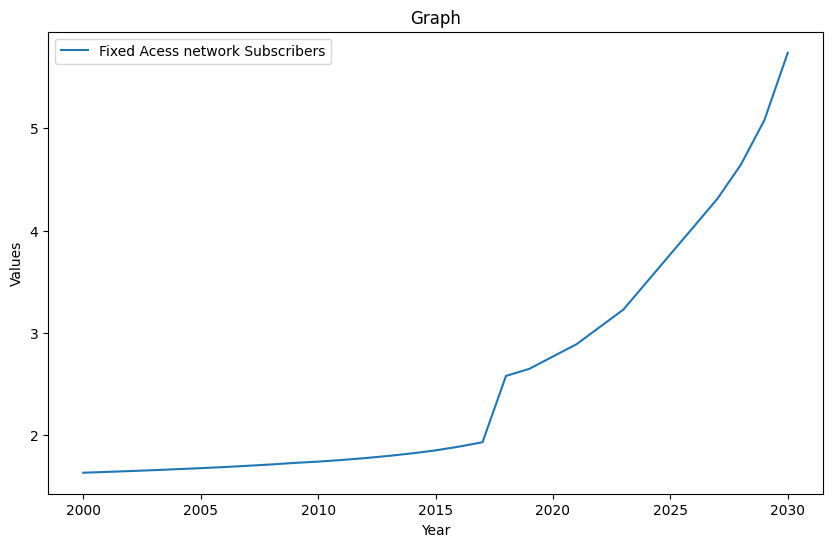

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score

# Data provided
data = {
    "Year": np.arange(2000, 2031),
    "World population": [6.15, 6.23, 6.31, 6.39, 6.48, 6.56, 6.64, 6.73, 6.81, 6.9, 6.99, 7.07, 7.16, 7.25, 7.34, 7.43, 7.51, 7.6, 7.68, 7.76, 7.84, 7.91, 7.98, 8.05, 8.12, 8.19, 8.26, 8.34, 8.41, 8.48, 8.55],
    "Fixed data traffic wired": [0.034073, 0.042968, 0.054185, 0.068329, 0.086166, 0.108659, 0.137024, 0.172793, 0.2179, 0.274781, 0.325, 0.39, 0.47, 0.568, 0.689, 0.839, 1.043, 1.283, 5, 5, 5.5, 6, 7, 8, 10, 12, 14, 16, 18, 21, 25],
    "Fixed data traffic in Wi-Fi": [0.009618, 0.012756, 0.016919, 0.02244, 0.029763, 0.039475, 0.052357, 0.069442, 0.092103, 0.122158, 0.118, 0.154, 0.2, 0.26, 0.338, 0.439, 0.585, 0.761, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 16, 18, 22],
    "Fixed Acess network Subscribers": [np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, 
                                        1.74, np.nan, np.nan, np.nan, np.nan, 1.85, np.nan, np.nan, np.nan, np.nan, np.nan, 
                                        np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan],
}

# Create DataFrame
df = pd.DataFrame(data)

# Prepare the feature matrix X and target vector y
X = df[["World population", "Fixed data traffic wired", "Fixed data traffic in Wi-Fi"]]
y = df["Fixed Acess network Subscribers"]

# Handle missing values in y by dropping those rows
df_non_nan = df.dropna(subset=["Fixed Acess network Subscribers"])
X_non_nan = df_non_nan[["World population", "Fixed data traffic wired", "Fixed data traffic in Wi-Fi"]]
y_non_nan = df_non_nan["Fixed Acess network Subscribers"]

# Train the Linear Regression model
model = LinearRegression()
model.fit(X_non_nan, y_non_nan)

# Predict on the full dataset
df_nan = df[df["Fixed Acess network Subscribers"].isna()]
X_nan = df_nan[["World population", "Fixed data traffic wired", "Fixed data traffic in Wi-Fi"]]
y_pred = model.predict(X_nan)

print(y_pred)

# Fill the NaN values with the predictions
df.loc[df["Fixed Acess network Subscribers"].isna(), "Fixed Acess network Subscribers"] = y_pred

# Evaluate the model
y_full_pred = model.predict(X_non_nan)
mse = mean_squared_error(y_non_nan, y_full_pred)
r2 = r2_score(y_non_nan, y_full_pred)

print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

# Plot the filled data
plt.figure(figsize=(10, 6))
# plt.plot(df['Year'], df['Enterprise Small Cells Shipments'], label='Enterprise Small Cells Shipments')
plt.plot(df['Year'], df['Fixed Acess network Subscribers'], label='Fixed Acess network Subscribers')
plt.title('Graph')
plt.xlabel('Year')
plt.ylabel('Values')
plt.legend()
plt.show()


### Future prediction

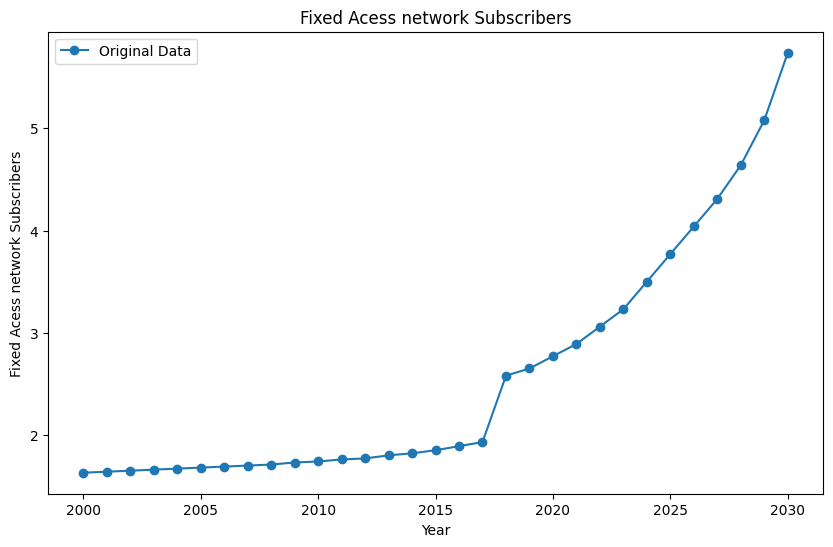

Mean Squared Error for each model:
Linear Regression: 0.19643784393951785
Ridge Regression: 0.19632446514336038
Lasso Regression: 0.1902621860889879
SVR: 0.05386510173508994

Best model: SVR


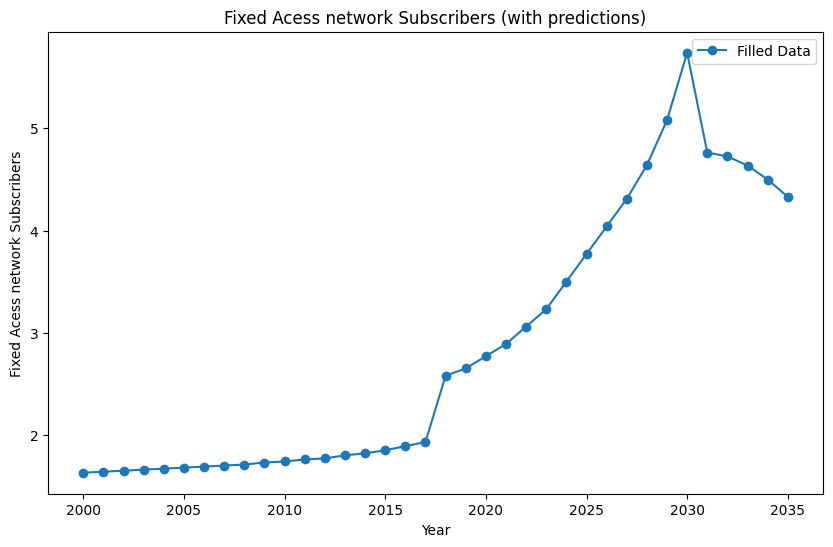


Filled DataFrame:
    Year  Fixed Acess network Subscribers
0   2000                         1.630000
1   2001                         1.640000
2   2002                         1.650000
3   2003                         1.660000
4   2004                         1.670000
5   2005                         1.680000
6   2006                         1.690000
7   2007                         1.700000
8   2008                         1.710000
9   2009                         1.730000
10  2010                         1.740000
11  2011                         1.760000
12  2012                         1.770000
13  2013                         1.800000
14  2014                         1.820000
15  2015                         1.850000
16  2016                         1.890000
17  2017                         1.930000
18  2018                         2.580000
19  2019                         2.650000
20  2020                         2.770000
21  2021                         2.890000
22  2022       

In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Prepare the data
data = {
    "Year": np.arange(2000, 2036),
    "Fixed Acess network Subscribers": [1.63, 1.64, 1.65, 1.66, 1.67, 1.68, 1.69, 1.70, 1.71, 1.73, 1.74, 
                                      1.76, 1.77, 1.80, 1.82, 1.85, 1.89, 1.93, 2.58, 2.65, 2.77, 2.89, 
                                      3.06, 3.23, 3.50, 3.77, 4.04, 4.31, 4.64, 5.08, 5.74, np.nan, np.nan, np.nan, np.nan, np.nan]
}

# Create DataFrame
df = pd.DataFrame(data)

# Plot the original data
plt.figure(figsize=(10, 6))
plt.plot(df['Year'], df['Fixed Acess network Subscribers'], label='Original Data', marker='o')
plt.xlabel('Year')
plt.ylabel('Fixed Acess network Subscribers')
plt.title('Fixed Acess network Subscribers')
plt.legend()
plt.show()

# Split the data into known and missing
known_data = df.dropna()
missing_data = df[df.isna().any(axis=1)]

# Prepare the feature matrix X and target vector y for training
X = known_data[['Year']]
y = known_data['Fixed Acess network Subscribers']

# Train regression models
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(),
    "Lasso Regression": Lasso(),
    "SVR": SVR()
}

results = {}
for name, model in models.items():
    # Split the known data into training and validation sets
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=21)
    
    # Train the model
    model.fit(X_train, y_train)
    
    # Validate the model
    y_pred_val = model.predict(X_val)
    mse = mean_squared_error(y_val, y_pred_val)
    results[name] = mse

# Print MSE for each model
print("Mean Squared Error for each model:")
for name, mse in results.items():
    print(f"{name}: {mse}")

# Select the best model (with the lowest MSE)
best_model_name = min(results, key=results.get)
best_model = models[best_model_name]
print(f"\nBest model: {best_model_name}")

# Train the best model on the entire known dataset
best_model.fit(X, y)

# Predict the missing values
X_missing = missing_data[['Year']]
y_missing_pred = best_model.predict(X_missing)

# Fill the missing values in the original dataframe
df.loc[df.isna().any(axis=1), 'Fixed Acess network Subscribers'] = y_missing_pred

# Plot the filled data
plt.figure(figsize=(10, 6))
plt.plot(df['Year'], df['Fixed Acess network Subscribers'], label='Filled Data', marker='o')
plt.xlabel('Year')
plt.ylabel('Fixed Acess network Subscribers')
plt.title('Fixed Acess network Subscribers (with predictions)')
plt.legend()
plt.show()

# Print the filled dataframe
print("\nFilled DataFrame:")
print(df)


# 10. Fillup column "Mobile network Subscribers":

[5.975186   6.01363786 6.05208972 6.09054158 6.16317287 6.20162473
 6.23580416 6.26998359 6.30416302 6.33407002 6.36397702 6.39388403
 6.42379103 6.45369803 6.48360503 6.51778446 6.54769147 6.57759847
 6.60750547]
Mean Squared Error: 0.942853748401955
R^2 Score: 0.1687242404267626


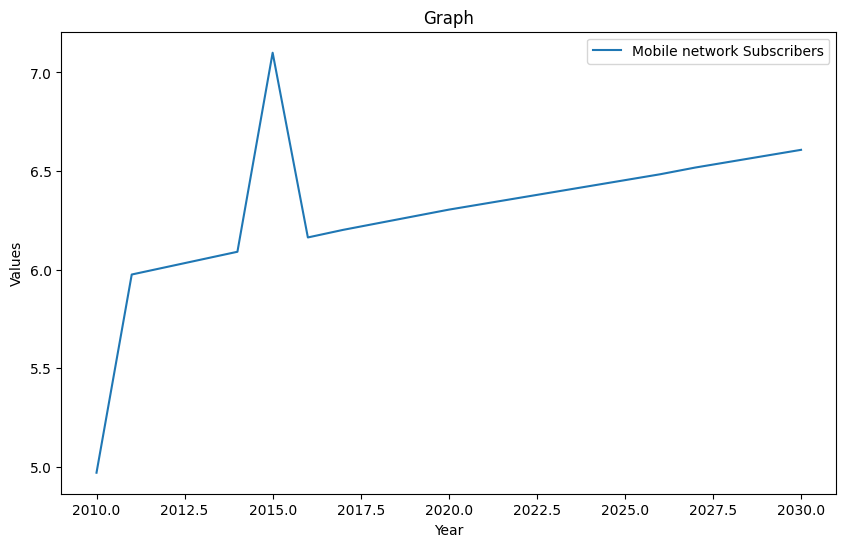

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score

# Data provided
data = {
    "Year": np.arange(2010, 2031),
    "World population": [6.99, 7.07, 7.16, 7.25, 7.34, 7.43, 7.51, 7.6, 7.68, 7.76, 7.84, 7.91, 7.98, 8.05, 8.12, 8.19, 8.26, 8.34, 8.41, 8.48, 8.55],
    "Mobile network Subscribers": [4.97, np.nan, np.nan, np.nan, np.nan, 7.1, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan]
}

# Create DataFrame
df = pd.DataFrame(data)

# Prepare the feature matrix X and target vector y
X = df[["World population"]]
y = df["Mobile network Subscribers"]

# Handle missing values in y by dropping those rows
df_non_nan = df.dropna(subset=["Mobile network Subscribers"])
X_non_nan = df_non_nan[["World population"]]
y_non_nan = df_non_nan["Mobile network Subscribers"]

# Train the Linear Regression model
model = Ridge()
model.fit(X_non_nan, y_non_nan)

# Predict on the full dataset
df_nan = df[df["Mobile network Subscribers"].isna()]
X_nan = df_nan[["World population"]]
y_pred = model.predict(X_nan)

print(y_pred)

# Fill the NaN values with the predictions
df.loc[df["Mobile network Subscribers"].isna(), "Mobile network Subscribers"] = y_pred

# Evaluate the model
y_full_pred = model.predict(X_non_nan)
mse = mean_squared_error(y_non_nan, y_full_pred)
r2 = r2_score(y_non_nan, y_full_pred)

print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

# Plot the filled data
plt.figure(figsize=(10, 6))
# plt.plot(df['Year'], df['Enterprise Small Cells Shipments'], label='Enterprise Small Cells Shipments')
plt.plot(df['Year'], df['Mobile network Subscribers'], label='Mobile network Subscribers')
plt.title('Graph')
plt.xlabel('Year')
plt.ylabel('Values')
plt.legend()
plt.show()


{'Linear Regression': 0.02009264563915372, 'Ridge Regression': 0.021582179521836532, 'Lasso Regression': 0.03283653896418184}
The best model is: Linear Regression with MSE: 0.02009264563915372
   Year  Predicted Mobile network Subscribers
0  2000                              5.494436
1  2001                              5.531093
2  2002                              5.567994
3  2003                              5.605142
4  2004                              5.642537
5  2005                              5.680182
6  2006                              5.718079
7  2007                              5.756228
8  2008                              5.794631
9  2009                              5.833291


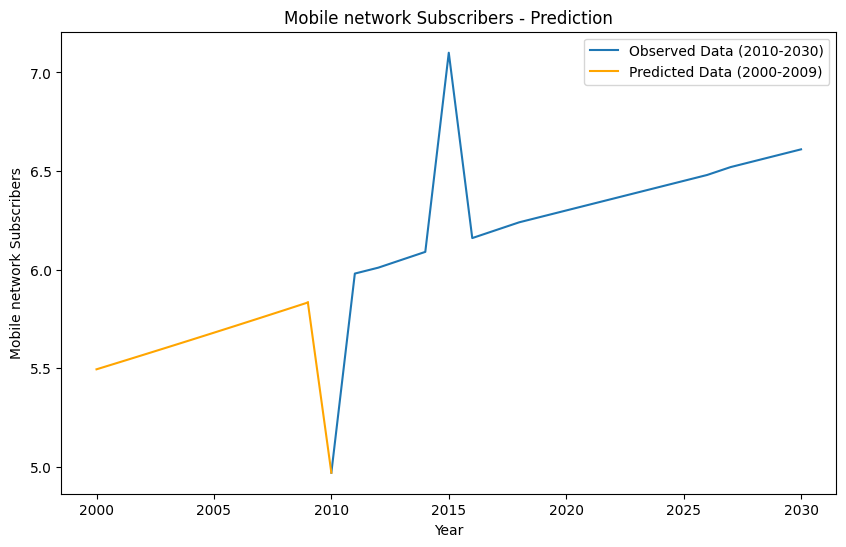

In [25]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.svm import SVR
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Prepare the data
data = {
    "Year": np.arange(2010, 2031),
    "Mobile network Subscribers": [4.97, 5.98, 6.01, 6.05, 6.09, 7.10, 6.16, 6.20, 6.24, 6.27, 6.30, 6.33, 6.36, 6.39, 6.42, 6.45, 6.48, 6.52, 6.55, 6.58, 6.61]
}


df = pd.DataFrame(data)

# Reverse the data for backcasting
df_reversed = df[::-1].reset_index(drop=True)

# Prepare features and target variable
X = df_reversed['Year'].values.reshape(-1, 1)
y = np.log(df_reversed['Mobile network Subscribers'].values.reshape(-1, 1))

# Scale the features and target
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()

X_scaled = scaler_X.fit_transform(X)
y_scaled = scaler_y.fit_transform(y)

# Define models
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(),
    "Lasso Regression": Lasso(),
    #"SVR": SVR()
}

# Evaluate models
results = {}
for name, model in models.items():
    model.fit(X_scaled, y_scaled.ravel())
    y_pred = model.predict(X_scaled).reshape(-1, 1)
    mse = mean_squared_error(y_scaled, y_pred)
    results[name] = mse

print(results)

# Select the best model
best_model_name = min(results, key=results.get)
best_model = models[best_model_name]

# Output the best model name
print(f"The best model is: {best_model_name} with MSE: {results[best_model_name]}")

# Fit the best model on the scaled data
best_model.fit(X_scaled, y_scaled.ravel())

# Predict for the years 2000 to 2009
years_to_predict = np.arange(2000, 2010).reshape(-1, 1)
years_to_predict_scaled = scaler_X.transform(years_to_predict)
predictions_scaled = best_model.predict(years_to_predict_scaled).reshape(-1, 1)
predictions_log = scaler_y.inverse_transform(predictions_scaled)
predictions = np.exp(predictions_log)

# Print the predicted values
predicted_values = pd.DataFrame({
    "Year": years_to_predict.flatten(),
    "Predicted Mobile network Subscribers": predictions.flatten()
})
print(predicted_values)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(df['Year'], df['Mobile network Subscribers'], label='Observed Data (2010-2030)')
plt.plot([predicted_values['Year'].iloc[-1], df['Year'].iloc[0]], [predicted_values['Predicted Mobile network Subscribers'].iloc[-1], df['Mobile network Subscribers'].iloc[0]], color='orange')
plt.plot(predicted_values['Year'], predicted_values['Predicted Mobile network Subscribers'], label='Predicted Data (2000-2009)', color='orange')
plt.title('Mobile network Subscribers - Prediction')
plt.xlabel('Year')
plt.ylabel('Mobile network Subscribers')
plt.legend()
plt.show()

### Future prediction:

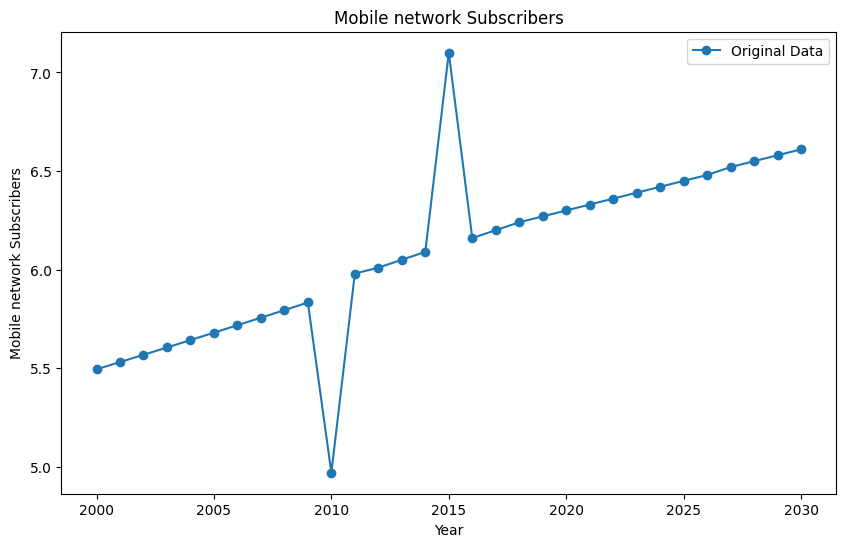

Mean Squared Error for each model:
Linear Regression: 0.0013974863617344806
Ridge Regression: 0.001385425856561227
Lasso Regression: 0.00932274877662714
SVR: 0.0056306074602675725

Best model: Ridge Regression


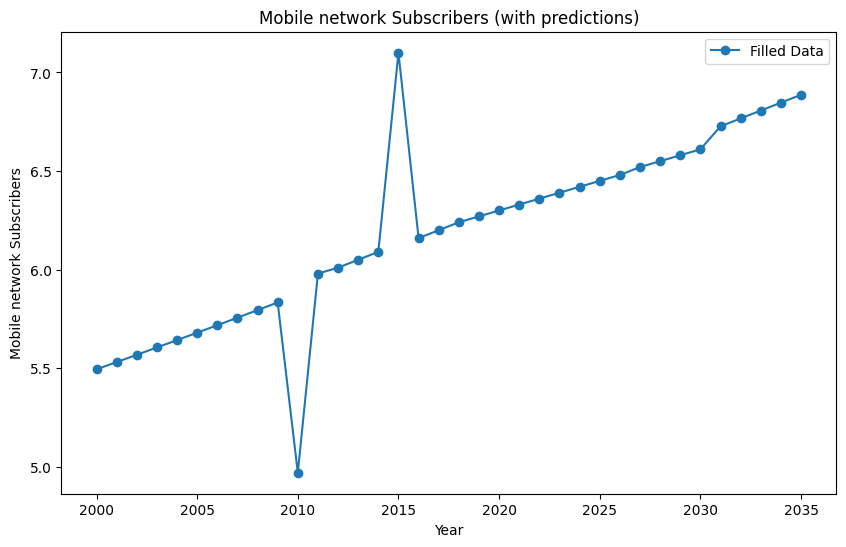


Filled DataFrame:
    Year  Mobile network Subscribers
0   2000                    5.494436
1   2001                    5.531093
2   2002                    5.567994
3   2003                    5.605142
4   2004                    5.642537
5   2005                    5.680182
6   2006                    5.718079
7   2007                    5.756228
8   2008                    5.794631
9   2009                    5.833291
10  2010                    4.970000
11  2011                    5.980000
12  2012                    6.010000
13  2013                    6.050000
14  2014                    6.090000
15  2015                    7.100000
16  2016                    6.160000
17  2017                    6.200000
18  2018                    6.240000
19  2019                    6.270000
20  2020                    6.300000
21  2021                    6.330000
22  2022                    6.360000
23  2023                    6.390000
24  2024                    6.420000
25  2025           

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Prepare the data
data = {
    "Year": np.arange(2000, 2036),
    "Mobile network Subscribers": [5.494436, 5.531093, 5.567994, 5.605142, 5.642537, 5.680182, 5.718079, 
                                   5.756228, 5.794631, 5.833291, 4.97, 5.98, 6.01, 6.05, 6.09, 7.10, 6.16, 
                                   6.20, 6.24, 6.27, 6.30, 6.33, 6.36, 6.39, 6.42, 6.45, 6.48, 6.52, 6.55, 
                                   6.58, 6.61, np.nan, np.nan, np.nan, np.nan, np.nan]
}

# Create DataFrame
df = pd.DataFrame(data)

# Plot the original data
plt.figure(figsize=(10, 6))
plt.plot(df['Year'], df['Mobile network Subscribers'], label='Original Data', marker='o')
plt.xlabel('Year')
plt.ylabel('Mobile network Subscribers')
plt.title('Mobile network Subscribers')
plt.legend()
plt.show()

# Split the data into known and missing
known_data = df.dropna()
missing_data = df[df.isna().any(axis=1)]

# Prepare the feature matrix X and target vector y for training
X = known_data[['Year']]
y = known_data['Mobile network Subscribers']

# Train regression models
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(),
    "Lasso Regression": Lasso(),
    "SVR": SVR()
}

results = {}
for name, model in models.items():
    # Split the known data into training and validation sets
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=21)
    
    # Train the model
    model.fit(X_train, y_train)
    
    # Validate the model
    y_pred_val = model.predict(X_val)
    mse = mean_squared_error(y_val, y_pred_val)
    results[name] = mse

# Print MSE for each model
print("Mean Squared Error for each model:")
for name, mse in results.items():
    print(f"{name}: {mse}")

# Select the best model (with the lowest MSE)
best_model_name = min(results, key=results.get)
best_model = models[best_model_name]
print(f"\nBest model: {best_model_name}")

# Train the best model on the entire known dataset
best_model.fit(X, y)

# Predict the missing values
X_missing = missing_data[['Year']]
y_missing_pred = best_model.predict(X_missing)

# Fill the missing values in the original dataframe
df.loc[df.isna().any(axis=1), 'Mobile network Subscribers'] = y_missing_pred

# Plot the filled data
plt.figure(figsize=(10, 6))
plt.plot(df['Year'], df['Mobile network Subscribers'], label='Filled Data', marker='o')
plt.xlabel('Year')
plt.ylabel('Mobile network Subscribers')
plt.title('Mobile network Subscribers (with predictions)')
plt.legend()
plt.show()

# Print the filled dataframe
print("\nFilled DataFrame:")
print(df)


# Enterprise Network

## 1. Fillup column "Enterprise Small Cells Shipments":

### a.Previous value

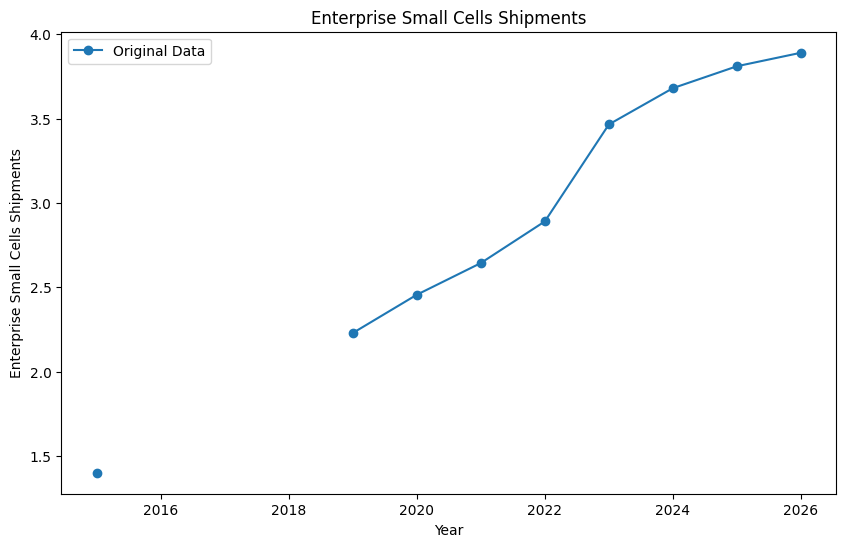

Mean Squared Error for each model:
Linear Regression: 0.0072008849365636125
Ridge Regression: 0.00866168982904536
Lasso Regression: 0.09358438666667203
SVR: 0.004122915975957488

Best model: SVR


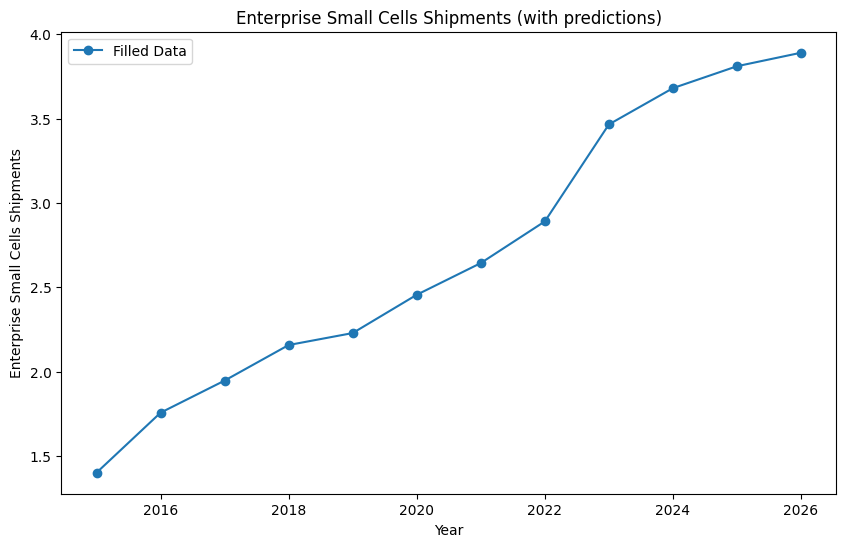


Filled DataFrame:
    Year  Enterprise Small Cells Shipments
0   2015                          1.400000
1   2016                          1.755804
2   2017                          1.946190
3   2018                          2.157066
4   2019                          2.228000
5   2020                          2.455000
6   2021                          2.643000
7   2022                          2.890000
8   2023                          3.465000
9   2024                          3.680000
10  2025                          3.810000
11  2026                          3.890000


In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Prepare the data
data = {
    "Year": np.arange(2015, 2027),
    "Enterprise Small Cells Shipments": [1.4, np.nan, np.nan, np.nan, 2.228, 2.455, 2.643, 2.89, 3.465, 3.68, 3.81, 3.89]
}

# Create DataFrame
df = pd.DataFrame(data)

# Plot the original data
plt.figure(figsize=(10, 6))
plt.plot(df['Year'], df['Enterprise Small Cells Shipments'], label='Original Data', marker='o')
plt.xlabel('Year')
plt.ylabel('Enterprise Small Cells Shipments')
plt.title('Enterprise Small Cells Shipments')
plt.legend()
plt.show()

# Split the data into known and missing
known_data = df.dropna()
missing_data = df[df.isna().any(axis=1)]

# Prepare the feature matrix X and target vector y for training
X = known_data[['Year']]
y = known_data['Enterprise Small Cells Shipments']

# Train regression models
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(),
    "Lasso Regression": Lasso(),
    "SVR": SVR()
}

results = {}
for name, model in models.items():
    # Split the known data into training and validation sets
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=21)
    
    # Train the model
    model.fit(X_train, y_train)
    
    # Validate the model
    y_pred_val = model.predict(X_val)
    mse = mean_squared_error(y_val, y_pred_val)
    results[name] = mse

# Print MSE for each model
print("Mean Squared Error for each model:")
for name, mse in results.items():
    print(f"{name}: {mse}")

# Select the best model (with the lowest MSE)
best_model_name = min(results, key=results.get)
best_model = models[best_model_name]
print(f"\nBest model: {best_model_name}")

# Train the best model on the entire known dataset
best_model.fit(X, y)

# Predict the missing values
X_missing = missing_data[['Year']]
y_missing_pred = best_model.predict(X_missing)

# Fill the missing values in the original dataframe
df.loc[df.isna().any(axis=1), 'Enterprise Small Cells Shipments'] = y_missing_pred

# Plot the filled data
plt.figure(figsize=(10, 6))
plt.plot(df['Year'], df['Enterprise Small Cells Shipments'], label='Filled Data', marker='o')
plt.xlabel('Year')
plt.ylabel('Enterprise Small Cells Shipments')
plt.title('Enterprise Small Cells Shipments (with predictions)')
plt.legend()
plt.show()

# Print the filled dataframe
print("\nFilled DataFrame:")
print(df)


{'Linear Regression': 0.0025254348316875977, 'Ridge Regression': 0.022178718763663965, 'Lasso Regression': 0.09608156330125885, 'SVR': 0.005581629593790472}
The best model is: Linear Regression with MSE: 0.0025254348316875977
    Year  Predicted Enterprise Small Cells Shipments
0   2000                                    0.400953
1   2001                                    0.438954
2   2002                                    0.480555
3   2003                                    0.526100
4   2004                                    0.575961
5   2005                                    0.630548
6   2006                                    0.690308
7   2007                                    0.755732
8   2008                                    0.827356
9   2009                                    0.905769
10  2010                                    0.991613
11  2011                                    1.085593
12  2012                                    1.188481
13  2013                        

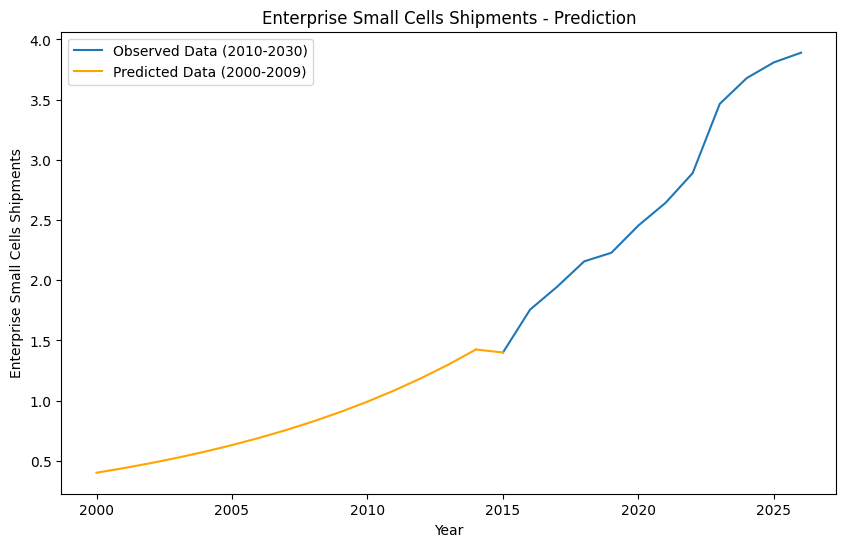

In [22]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.svm import SVR
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Prepare the data
data = {
    "Year": np.arange(2015, 2027),
    "Enterprise Small Cells Shipments": [1.4, 1.755804, 1.94619, 2.157066, 2.228, 2.455, 2.643, 2.89, 3.465, 3.68, 3.81, 3.89]
}

df = pd.DataFrame(data)

# Reverse the data for backcasting
df_reversed = df[::-1].reset_index(drop=True)

# Prepare features and target variable
X = df_reversed['Year'].values.reshape(-1, 1)
y = np.log(df_reversed['Enterprise Small Cells Shipments'].values.reshape(-1, 1))

# Scale the features and target
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()

X_scaled = scaler_X.fit_transform(X)
y_scaled = scaler_y.fit_transform(y)

# Define models
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(),
    "Lasso Regression": Lasso(),
    "SVR": SVR()
}

# Evaluate models
results = {}
for name, model in models.items():
    model.fit(X_scaled, y_scaled.ravel())
    y_pred = model.predict(X_scaled).reshape(-1, 1)
    mse = mean_squared_error(y_scaled, y_pred)
    results[name] = mse

print(results)

# Select the best model
best_model_name = min(results, key=results.get)
best_model = models[best_model_name]

# Output the best model name
print(f"The best model is: {best_model_name} with MSE: {results[best_model_name]}")

# Fit the best model on the scaled data
best_model.fit(X_scaled, y_scaled.ravel())

# Predict for the years 2000 to 2009
years_to_predict = np.arange(2000, 2015).reshape(-1, 1)
years_to_predict_scaled = scaler_X.transform(years_to_predict)
predictions_scaled = best_model.predict(years_to_predict_scaled).reshape(-1, 1)
predictions_log = scaler_y.inverse_transform(predictions_scaled)
predictions = np.exp(predictions_log)

# Print the predicted values
predicted_values = pd.DataFrame({
    "Year": years_to_predict.flatten(),
    "Predicted Enterprise Small Cells Shipments": predictions.flatten()
})
print(predicted_values)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(df['Year'], df['Enterprise Small Cells Shipments'], label='Observed Data (2010-2030)')
plt.plot([predicted_values['Year'].iloc[-1], df['Year'].iloc[0]], [predicted_values['Predicted Enterprise Small Cells Shipments'].iloc[-1], df['Enterprise Small Cells Shipments'].iloc[0]], color='orange')
plt.plot(predicted_values['Year'], predicted_values['Predicted Enterprise Small Cells Shipments'], label='Predicted Data (2000-2009)', color='orange')
plt.title('Enterprise Small Cells Shipments - Prediction')
plt.xlabel('Year')
plt.ylabel('Enterprise Small Cells Shipments')
plt.legend()
plt.show()

### Future value prediction

                            AutoReg Model Results                             
Dep. Variable:                      y   No. Observations:                   27
Model:                     AutoReg(8)   Log Likelihood                  28.530
Method:               Conditional MLE   S.D. of innovations              0.054
Date:                Fri, 26 Jul 2024   AIC                            -37.061
Time:                        10:59:42   BIC                            -27.616
Sample:                             8   HQIC                           -35.462
                                   27                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0292      0.029      0.999      0.318      -0.028       0.086
y.L1           0.4040      0.221      1.827      0.068      -0.029       0.837
y.L2          -0.0912      0.189     -0.484      0.6

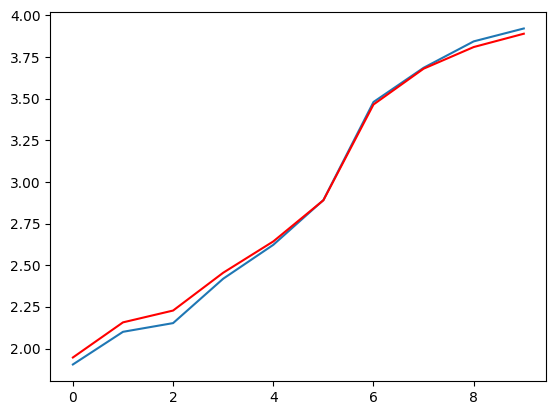

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf

# Prepare the data
data = {
    "Year": np.arange(2000, 2027),
    "Enterprise Small Cells Shipments": [0.400953, 0.438954, 0.480555, 0.5261, 0.575961, 0.630548, 0.690308, 0.755732, 
                                         0.827356, 0.905769, 0.991613, 1.085593, 1.188481, 1.301119, 1.424432, 1.4,
                                         1.755804, 1.94619, 2.157066, 2.228, 2.455, 2.643, 2.89, 3.465, 3.68, 3.81, 3.89]
}

# Create DataFrame
df = pd.DataFrame(data)
df.set_index("Year", inplace=True)
X=df.values

from statsmodels.tsa.ar_model import AutoReg

train = X[:len(X)-10]
test = X[len(X)-10:]

model = AutoReg(X,lags=8).fit()

print(model.summary())

pred = model.predict(start=len(train),end=len(X)-1,dynamic=False)

from matplotlib import pyplot
pyplot.plot(pred)
pyplot.plot(test, color= 'red')
print(pred)


In [2]:
pred_future = model.predict(start=len(X), end=len(X)+8, dynamic=False)
print("The future prediction for the next 10 years")
print(pred_future)
print('Number of predictions made: \t', len(pred_future))

The future prediction for the next 10 years
[4.57912678 5.12266035 5.7303415  6.21254141 6.31173772 6.60839482
 7.48860652 9.08887639 9.75983028]
Number of predictions made: 	 9


# 2. Fillup "WLAN Access Points Shipments":

[ 0.37224067  0.90541219  1.48909336  2.12811067  2.82768345  3.59356417
  4.43202447  5.3499533   6.35487098  7.45504145  8.65947228  9.97805492
 11.42162091 14.73212201 14.38932981 19.38142366 22.05262685 25.01131417
 31.8291918  35.29471546 43.36223006 46.37877899 48.20273882 49.32517563]
Mean Squared Error: 0.5686944459430273
R^2 Score: 0.9885364405718347


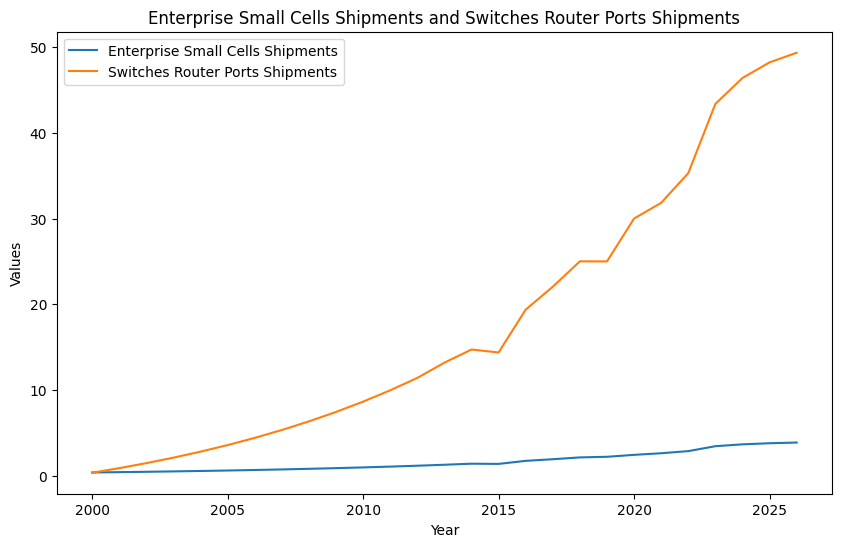

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score

# Data provided
data = {
    "Year": [2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024, 2025, 2026],
    "Enterprise Small Cells Shipments": [0.400953, 0.438954, 0.480555, 0.5261, 0.575961, 0.630548, 0.690308, 0.755732, 
                                         0.827356, 0.905769, 0.991613, 1.085593, 1.188481, 1.301119, 1.424432, 1.4,
                                         1.755804, 1.94619, 2.157066, 2.228, 2.455, 2.643, 2.89, 3.465, 3.68, 3.81, 3.89],
    "Switches Router Ports Shipments": [np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, 13.2, np.nan, np.nan, np.nan, np.nan, np.nan, 25,30, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan],
}

# Create DataFrame
df = pd.DataFrame(data)

# Prepare the feature matrix X and target vector y
X = df[["Enterprise Small Cells Shipments"]]
y = df["Switches Router Ports Shipments"]

# Handle missing values in y by dropping those rows
df_non_nan = df.dropna(subset=["Switches Router Ports Shipments"])
X_non_nan = df_non_nan[["Enterprise Small Cells Shipments"]]
y_non_nan = df_non_nan["Switches Router Ports Shipments"]

# Train the Linear Regression model
model = LinearRegression()
model.fit(X_non_nan, y_non_nan)

# Predict on the full dataset
df_nan = df[df["Switches Router Ports Shipments"].isna()]
X_nan = df_nan[["Enterprise Small Cells Shipments"]]
y_pred = model.predict(X_nan)

print(y_pred)

# Fill the NaN values with the predictions
df.loc[df["Switches Router Ports Shipments"].isna(), "Switches Router Ports Shipments"] = y_pred

# Evaluate the model
y_full_pred = model.predict(X_non_nan)
mse = mean_squared_error(y_non_nan, y_full_pred)
r2 = r2_score(y_non_nan, y_full_pred)

print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

# Plot the filled data
plt.figure(figsize=(10, 6))
plt.plot(df['Year'], df['Enterprise Small Cells Shipments'], label='Enterprise Small Cells Shipments')
plt.plot(df['Year'], df['Switches Router Ports Shipments'], label='Switches Router Ports Shipments')
plt.title('Enterprise Small Cells Shipments and Switches Router Ports Shipments')
plt.xlabel('Year')
plt.ylabel('Values')
plt.legend()
plt.show()


### Future predictions

                            AutoReg Model Results                             
Dep. Variable:                      y   No. Observations:                   27
Model:                     AutoReg(8)   Log Likelihood                 -19.269
Method:               Conditional MLE   S.D. of innovations              0.667
Date:                Fri, 26 Jul 2024   AIC                             58.538
Time:                        11:00:25   BIC                             67.982
Sample:                             8   HQIC                            60.136
                                   27                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.7764      1.438      1.931      0.054      -0.042       5.595
y.L1           0.0277      0.215      0.129      0.897      -0.393       0.448
y.L2          -0.0583      0.178     -0.328      0.7

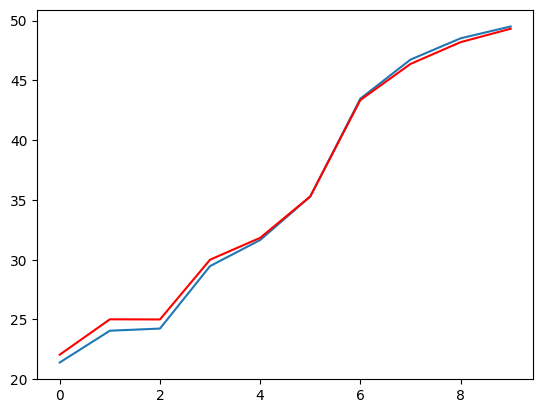

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Prepare the data
data = {
    "Year": np.arange(2000, 2027),
    "Switches Router Ports Shipments": [0.37224067, 0.90541219, 1.48909336, 2.12811067, 2.82768345, 3.59356417, 4.43202447, 
                                        5.3499533, 6.35487098, 7.45504145, 8.65947228, 9.97805492, 11.42162091, 13.2, 
                                        14.73212201, 14.38932981, 19.38142366, 22.05262685, 25.01131417, 25, 30, 
                                        31.8291918, 35.29471546, 43.36223006, 46.37877899, 48.20273882, 49.32517563],
}

# Create DataFrame
df = pd.DataFrame(data)
df.set_index("Year", inplace=True)
X=df.values

from statsmodels.tsa.ar_model import AutoReg

train = X[:len(X)-10]
test = X[len(X)-10:]

model = AutoReg(X,lags=8).fit()

print(model.summary())

pred = model.predict(start=len(train),end=len(X)-1,dynamic=False)

from matplotlib import pyplot
pyplot.plot(pred)
pyplot.plot(test, color= 'red')
print(pred)

In [4]:
pred_future = model.predict(start=len(X), end=len(X)+8, dynamic=False)
print("The future prediction for the next 5 years")
print(pred_future)
print('Number of predictions made: \t', len(pred_future))

The future prediction for the next 5 years
[ 64.43027387  66.59579176  75.16378208  81.65833447  89.55678104
  90.99879498 106.19739142 132.10133327 128.89595036]
Number of predictions made: 	 9


# 3. Fillup "Switches Router Ports Shipments":

### a. past values

[ 31.48745697  35.72687364  40.3679087   45.448939    51.01146511
  57.10122691  63.76809201  71.06683669  79.05725747  87.80506358
  97.38187695 107.86634787 119.34460115 131.91057087 145.66745066
 142.94180059 182.63552999 203.87511798 227.40058392 235.31402784
 309.16718538 373.31456541 397.30010751 411.80299344 420.72784631]
Mean Squared Error: 113.17338162064324
R^2 Score: 0.7463990608269611


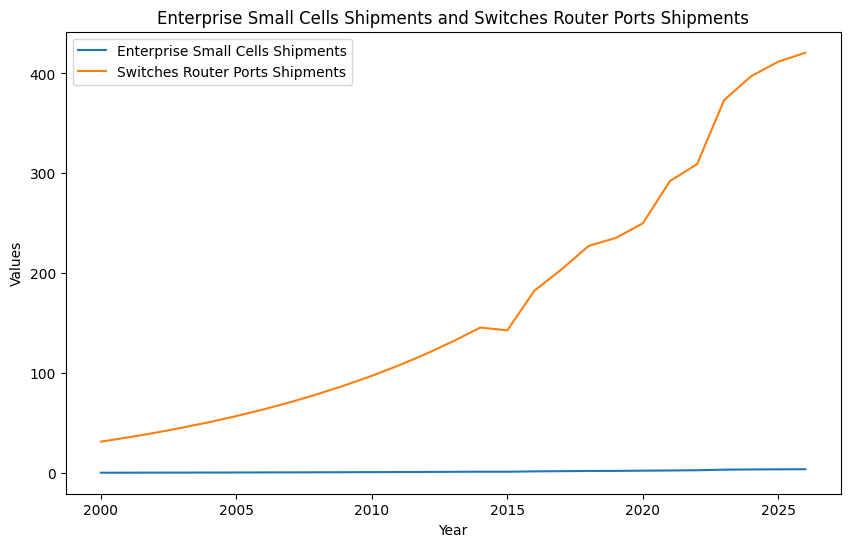

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score

# Data provided
data = {
    "Year": [2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024, 2025, 2026],
    "Enterprise Small Cells Shipments": [0.400953, 0.438954, 0.480555, 0.5261, 0.575961, 0.630548, 0.690308, 0.755732, 
                                         0.827356, 0.905769, 0.991613, 1.085593, 1.188481, 1.301119, 1.424432, 1.4,
                                         1.755804, 1.94619, 2.157066, 2.228, 2.455, 2.643, 2.89, 3.465, 3.68, 3.81, 3.89],
    "Switches Router Ports Shipments": [np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, 250, 292.25, np.nan, np.nan, np.nan, np.nan, np.nan],
}

# Create DataFrame
df = pd.DataFrame(data)

# Prepare the feature matrix X and target vector y
X = df[["Enterprise Small Cells Shipments"]]
y = df["Switches Router Ports Shipments"]

# Handle missing values in y by dropping those rows
df_non_nan = df.dropna(subset=["Switches Router Ports Shipments"])
X_non_nan = df_non_nan[["Enterprise Small Cells Shipments"]]
y_non_nan = df_non_nan["Switches Router Ports Shipments"]

# Train the Linear Regression model
model = Lasso()
model.fit(X_non_nan, y_non_nan)

# Predict on the full dataset
df_nan = df[df["Switches Router Ports Shipments"].isna()]
X_nan = df_nan[["Enterprise Small Cells Shipments"]]
y_pred = model.predict(X_nan)

print(y_pred)

# Fill the NaN values with the predictions
df.loc[df["Switches Router Ports Shipments"].isna(), "Switches Router Ports Shipments"] = y_pred

# Evaluate the model
y_full_pred = model.predict(X_non_nan)
mse = mean_squared_error(y_non_nan, y_full_pred)
r2 = r2_score(y_non_nan, y_full_pred)

print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

# Plot the filled data
plt.figure(figsize=(10, 6))
plt.plot(df['Year'], df['Enterprise Small Cells Shipments'], label='Enterprise Small Cells Shipments')
plt.plot(df['Year'], df['Switches Router Ports Shipments'], label='Switches Router Ports Shipments')
plt.title('Enterprise Small Cells Shipments and Switches Router Ports Shipments')
plt.xlabel('Year')
plt.ylabel('Values')
plt.legend()
plt.show()


### Future

                            AutoReg Model Results                             
Dep. Variable:                      y   No. Observations:                   27
Model:                     AutoReg(8)   Log Likelihood                 -62.155
Method:               Conditional MLE   S.D. of innovations              6.375
Date:                Fri, 26 Jul 2024   AIC                            144.310
Time:                        11:00:54   BIC                            153.754
Sample:                             8   HQIC                           145.908
                                   27                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          9.0625      4.568      1.984      0.047       0.109      18.016
y.L1           0.3745      0.260      1.438      0.150      -0.136       0.885
y.L2          -0.4530      0.201     -2.254      0.0

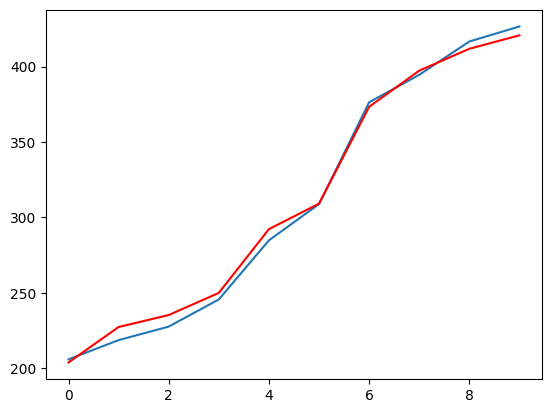

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf

# Prepare the data
data = {
    "Year": np.arange(2000, 2027),
    "Switches Router Ports Shipments": [31.48745697, 35.72687364, 40.3679087, 45.448939, 51.01146511, 57.10122691, 63.76809201, 
                                        71.06683669, 79.05725747, 87.80506358, 97.38187695, 107.8663479, 119.3446012, 131.9105709, 
                                        145.6674507, 142.9418006, 182.63553, 203.875118, 227.4005839, 235.3140278, 250, 292.25, 
                                        309.1671854, 373.3145654, 397.3001075, 411.8029934, 420.7278463],
}

# Create DataFrame
df = pd.DataFrame(data)
df.set_index("Year", inplace=True)
X=df.values

from statsmodels.tsa.ar_model import AutoReg

train = X[:len(X)-10]
test = X[len(X)-10:]

model = AutoReg(X,lags=8).fit()

print(model.summary())

pred = model.predict(start=len(train),end=len(X)-1,dynamic=False)

from matplotlib import pyplot
pyplot.plot(pred)
pyplot.plot(test, color= 'red')
print(pred)


In [6]:
pred_future = model.predict(start=len(X), end=len(X)+8, dynamic=False)
print("The future prediction for the next 5 years")
print(pred_future)
print('Number of predictions made: \t', len(pred_future))

The future prediction for the next 5 years
[ 486.14180267  603.9127508   634.71751177  677.06798081  674.48677418
  748.15502303  868.93426857 1032.90200777 1161.75124312]
Number of predictions made: 	 9


# 4. Fillup column "Enterprise Small Cells Installed base":

[18.8526194  21.3237299  27.07631506 29.22728169 30.52786616 38.2225919
 43.66037129 49.73991488 54.56408192 55.556491   58.52439575 67.33047012
 83.34036353 90.05291899]
Mean Squared Error: 48.60563505955431
R^2 Score: 0.757241893096159


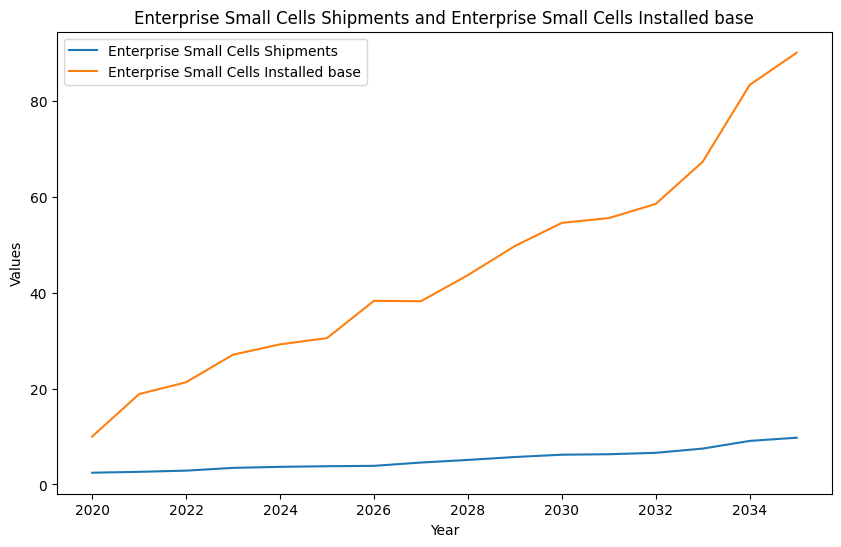

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score

# Data provided
'''data = {
    "Year": np.arange(2000, 2036),
    "Enterprise Small Cells Shipments": [0.400953, 0.438954, 0.480555, 0.5261, 0.575961, 0.630548, 0.690308, 0.755732, 
                                         0.827356, 0.905769, 0.991613, 1.085593, 1.188481, 1.301119, 1.424432, 1.4,
                                         1.755804, 1.94619, 2.157066, 2.228, 2.455, 2.643, 2.89, 3.465, 3.68, 3.81, 3.89,
                                         4.57912678, 5.12266035, 5.7303415, 6.21254141, 6.31173772, 6.60839482, 7.48860652, 9.08887639, 9.75983028],
    "Enterprise Small Cells Installed base": [np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, 
                                              np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, 10, np.nan, 
                                              np.nan, np.nan, np.nan, np.nan, 38.3, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan],
}'''

data = {
    "Year": np.arange(2020, 2036),
    "Enterprise Small Cells Shipments": [2.455, 2.643, 2.89, 3.465, 3.68, 3.81, 3.89, 4.57912678, 
                                         5.12266035, 5.7303415, 6.21254141, 6.31173772, 6.60839482, 7.48860652, 9.08887639, 9.75983028],
    "Enterprise Small Cells Installed base": [10, np.nan, np.nan, np.nan, np.nan, np.nan, 38.3, np.nan, 
                                              np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan],
}

# Create DataFrame
df = pd.DataFrame(data)

# Prepare the feature matrix X and target vector y
X = df[["Enterprise Small Cells Shipments"]]
y = df["Enterprise Small Cells Installed base"]

# Handle missing values in y by dropping those rows
df_non_nan = df.dropna(subset=["Enterprise Small Cells Installed base"])
X_non_nan = df_non_nan[["Enterprise Small Cells Shipments"]]
y_non_nan = df_non_nan["Enterprise Small Cells Installed base"]

# Train the Linear Regression model
model = Ridge()
model.fit(X_non_nan, y_non_nan)

# Predict on the full dataset
df_nan = df[df["Enterprise Small Cells Installed base"].isna()]
X_nan = df_nan[["Enterprise Small Cells Shipments"]]
y_pred = model.predict(X_nan)

print(y_pred)

# Fill the NaN values with the predictions
df.loc[df["Enterprise Small Cells Installed base"].isna(), "Enterprise Small Cells Installed base"] = y_pred

# Evaluate the model
y_full_pred = model.predict(X_non_nan)
mse = mean_squared_error(y_non_nan, y_full_pred)
r2 = r2_score(y_non_nan, y_full_pred)

print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

# Plot the filled data
plt.figure(figsize=(10, 6))
plt.plot(df['Year'], df['Enterprise Small Cells Shipments'], label='Enterprise Small Cells Shipments')
plt.plot(df['Year'], df['Enterprise Small Cells Installed base'], label='Enterprise Small Cells Installed base')
plt.title('Enterprise Small Cells Shipments and Enterprise Small Cells Installed base')
plt.xlabel('Year')
plt.ylabel('Values')
plt.legend()
plt.show()


### Add previous values:

{'Linear Regression': 0.0044456291472510095, 'Ridge Regression': 0.014147902322689018, 'Lasso Regression': 0.06562504948165467, 'SVR': 0.004978890906536963}
The best model is: Linear Regression with MSE: 0.0044456291472510095
    Year  Predicted Enterprise Small Cells Installed base
0   2000                                         1.519566
1   2001                                         1.709758
2   2002                                         1.923755
3   2003                                         2.164537
4   2004                                         2.435455
5   2005                                         2.740282
6   2006                                         3.083261
7   2007                                         3.469169
8   2008                                         3.903377
9   2009                                         4.391932
10  2010                                         4.941636
11  2011                                         5.560142
12  2012            

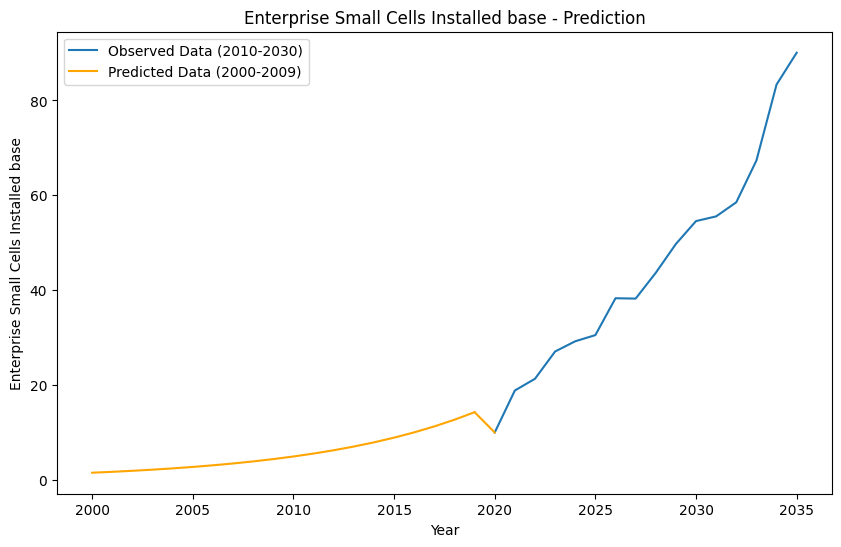

In [9]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.svm import SVR
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Prepare the data
data = {
    "Year": np.arange(2020, 2036),
    "Enterprise Small Cells Installed base": [10, 18.8526194, 21.3237299, 27.07631506, 29.22728169, 30.52786616, 38.3, 
                                              38.2225919, 43.66037129, 49.73991488, 54.56408192, 55.556491, 58.52439575, 
                                              67.33047012, 83.34036353, 90.05291899]
}

df = pd.DataFrame(data)

# Reverse the data for backcasting
df_reversed = df[::-1].reset_index(drop=True)

# Prepare features and target variable
X = df_reversed['Year'].values.reshape(-1, 1)
y = np.log(df_reversed['Enterprise Small Cells Installed base'].values.reshape(-1, 1))

# Scale the features and target
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()

X_scaled = scaler_X.fit_transform(X)
y_scaled = scaler_y.fit_transform(y)

# Define models
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(),
    "Lasso Regression": Lasso(),
    "SVR": SVR()
}

# Evaluate models
results = {}
for name, model in models.items():
    model.fit(X_scaled, y_scaled.ravel())
    y_pred = model.predict(X_scaled).reshape(-1, 1)
    mse = mean_squared_error(y_scaled, y_pred)
    results[name] = mse

print(results)

# Select the best model
best_model_name = min(results, key=results.get)
best_model = models[best_model_name]

# Output the best model name
print(f"The best model is: {best_model_name} with MSE: {results[best_model_name]}")

# Fit the best model on the scaled data
best_model.fit(X_scaled, y_scaled.ravel())

# Predict for the years 2000 to 2009
years_to_predict = np.arange(2000, 2020).reshape(-1, 1)
years_to_predict_scaled = scaler_X.transform(years_to_predict)
predictions_scaled = best_model.predict(years_to_predict_scaled).reshape(-1, 1)
predictions_log = scaler_y.inverse_transform(predictions_scaled)
predictions = np.exp(predictions_log)

# Print the predicted values
predicted_values = pd.DataFrame({
    "Year": years_to_predict.flatten(),
    "Predicted Enterprise Small Cells Installed base": predictions.flatten()
})
print(predicted_values)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(df['Year'], df['Enterprise Small Cells Installed base'], label='Observed Data (2010-2030)')
plt.plot([predicted_values['Year'].iloc[-1], df['Year'].iloc[0]], [predicted_values['Predicted Enterprise Small Cells Installed base'].iloc[-1], df['Enterprise Small Cells Installed base'].iloc[0]], color='orange')
plt.plot(predicted_values['Year'], predicted_values['Predicted Enterprise Small Cells Installed base'], label='Predicted Data (2000-2009)', color='orange')
plt.title('Enterprise Small Cells Installed base - Prediction')
plt.xlabel('Year')
plt.ylabel('Enterprise Small Cells Installed base')
plt.legend()
plt.show()

# 5. Fillup column "Switches/Routers Ports Installed base":

[1579.87981205 1883.19621033 1996.61016801 2065.1860493  2107.38659181
 2416.69190799 2973.56359627 3119.22175341 3319.47298304 3307.26792823
 3655.6030885  4226.69930104 5002.00928485 5611.26387765]
Mean Squared Error: 0.012525079989609967
R^2 Score: 0.999998747492001


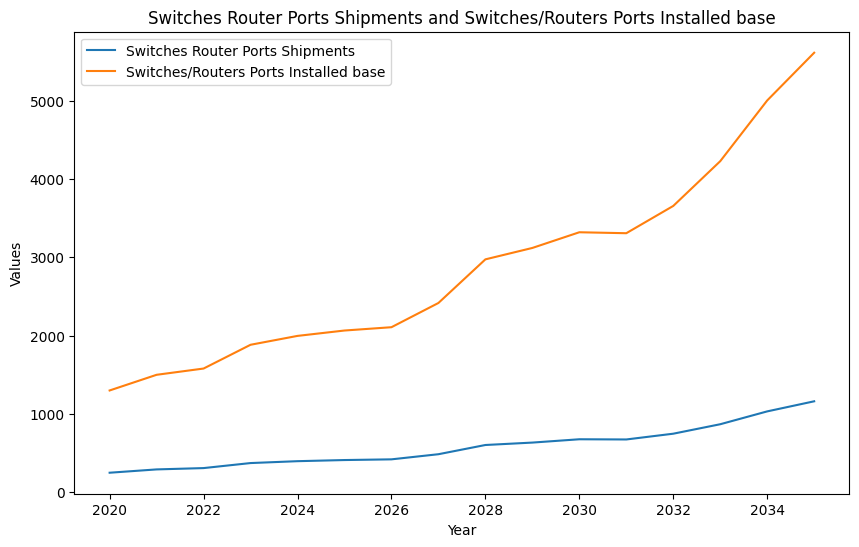

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score

# Data provided
data = {
    "Year": np.arange(2020, 2036),
    "Switches Router Ports Shipments": [250, 292.25, 309.1671854, 373.3145654, 397.3001075, 411.8029934, 420.7278463, 
                                        486.1418027, 603.9127508, 634.7175118, 677.0679808, 674.4867742, 748.155023, 
                                        868.9342686, 1032.902008, 1161.751243],
    
    "Switches/Routers Ports Installed base": [1300, 1500, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, 
                                              np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan],
}

# Create DataFrame
df = pd.DataFrame(data)

# Prepare the feature matrix X and target vector y
X = df[["Switches Router Ports Shipments"]]
y = df["Switches/Routers Ports Installed base"]

# Handle missing values in y by dropping those rows
df_non_nan = df.dropna(subset=["Switches/Routers Ports Installed base"])
X_non_nan = df_non_nan[["Switches Router Ports Shipments"]]
y_non_nan = df_non_nan["Switches/Routers Ports Installed base"]

# Train the Linear Regression model
model = Ridge()
model.fit(X_non_nan, y_non_nan)

# Predict on the full dataset
df_nan = df[df["Switches/Routers Ports Installed base"].isna()]
X_nan = df_nan[["Switches Router Ports Shipments"]]
y_pred = model.predict(X_nan)

print(y_pred)

# Fill the NaN values with the predictions
df.loc[df["Switches/Routers Ports Installed base"].isna(), "Switches/Routers Ports Installed base"] = y_pred

# Evaluate the model
y_full_pred = model.predict(X_non_nan)
mse = mean_squared_error(y_non_nan, y_full_pred)
r2 = r2_score(y_non_nan, y_full_pred)

print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

# Plot the filled data
plt.figure(figsize=(10, 6))
plt.plot(df['Year'], df['Switches Router Ports Shipments'], label='Switches Router Ports Shipments')
plt.plot(df['Year'], df['Switches/Routers Ports Installed base'], label='Switches/Routers Ports Installed base')
plt.title('Switches Router Ports Shipments and Switches/Routers Ports Installed base')
plt.xlabel('Year')
plt.ylabel('Values')
plt.legend()
plt.show()


{'Linear Regression': 0.0014165900447906418, 'Ridge Regression': 0.014379854641603483, 'Lasso Regression': 0.08315877554439682, 'SVR': 0.003129177617016519}
The best model is: Linear Regression with MSE: 0.0014165900447906418
    Year  Predicted Switches/Routers Ports Installed base
0   2000                                       217.480809
1   2001                                       238.128840
2   2002                                       260.737233
3   2003                                       285.492109
4   2004                                       312.597259
5   2005                                       342.275822
6   2006                                       374.772122
7   2007                                       410.353681
8   2008                                       449.313420
9   2009                                       491.972068
10  2010                                       538.680807
11  2011                                       589.824161
12  2012            

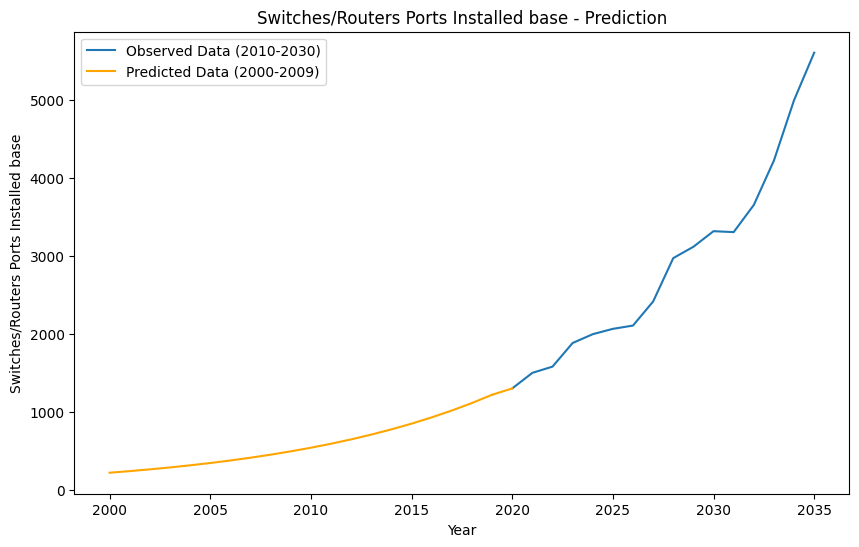

In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.svm import SVR
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Prepare the data
data = {
    "Year": np.arange(2020, 2036),
    "Switches/Routers Ports Installed base": [1300, 1500, 1579.879812, 1883.19621, 1996.610168, 2065.186049, 
                                              2107.386592, 2416.691908, 2973.563596, 3119.221753, 3319.472983, 
                                              3307.267928, 3655.603089, 4226.699301, 5002.009285, 5611.263878]
}

df = pd.DataFrame(data)

# Reverse the data for backcasting
df_reversed = df[::-1].reset_index(drop=True)

# Prepare features and target variable
X = df_reversed['Year'].values.reshape(-1, 1)
y = np.log(df_reversed['Switches/Routers Ports Installed base'].values.reshape(-1, 1))

# Scale the features and target
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()

X_scaled = scaler_X.fit_transform(X)
y_scaled = scaler_y.fit_transform(y)

# Define models
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(),
    "Lasso Regression": Lasso(),
    "SVR": SVR()
}

# Evaluate models
results = {}
for name, model in models.items():
    model.fit(X_scaled, y_scaled.ravel())
    y_pred = model.predict(X_scaled).reshape(-1, 1)
    mse = mean_squared_error(y_scaled, y_pred)
    results[name] = mse

print(results)

# Select the best model
best_model_name = min(results, key=results.get)
best_model = models[best_model_name]

# Output the best model name
print(f"The best model is: {best_model_name} with MSE: {results[best_model_name]}")

# Fit the best model on the scaled data
best_model.fit(X_scaled, y_scaled.ravel())

# Predict for the years 2000 to 2009
years_to_predict = np.arange(2000, 2020).reshape(-1, 1)
years_to_predict_scaled = scaler_X.transform(years_to_predict)
predictions_scaled = best_model.predict(years_to_predict_scaled).reshape(-1, 1)
predictions_log = scaler_y.inverse_transform(predictions_scaled)
predictions = np.exp(predictions_log)

# Print the predicted values
predicted_values = pd.DataFrame({
    "Year": years_to_predict.flatten(),
    "Predicted Switches/Routers Ports Installed base": predictions.flatten()
})
print(predicted_values)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(df['Year'], df['Switches/Routers Ports Installed base'], label='Observed Data (2010-2030)')
plt.plot([predicted_values['Year'].iloc[-1], df['Year'].iloc[0]], [predicted_values['Predicted Switches/Routers Ports Installed base'].iloc[-1], df['Switches/Routers Ports Installed base'].iloc[0]], color='orange')
plt.plot(predicted_values['Year'], predicted_values['Predicted Switches/Routers Ports Installed base'], label='Predicted Data (2000-2009)', color='orange')
plt.title('Switches/Routers Ports Installed base - Prediction')
plt.xlabel('Year')
plt.ylabel('Switches/Routers Ports Installed base')
plt.legend()
plt.show()

# 6. Fillup Column "WLAN Access Points Installed base":

{'Linear Regression': 4.571446827756123e-07, 'Ridge Regression': 0.018973199264806475, 'Lasso Regression': 0.09723942037569513, 'SVR': 0.002684081932595134}
The best model is: Linear Regression with MSE: 4.571446827756123e-07
    Year  Predicted WLAN Access Points Installed base
0   2000                                    40.815430
1   2001                                    43.559894
2   2002                                    46.488898
3   2003                                    49.614850
4   2004                                    52.950994
5   2005                                    56.511464
6   2006                                    60.311342
7   2007                                    64.366728
8   2008                                    68.694801
9   2009                                    73.313897
10  2010                                    78.243585
11  2011                                    83.504750
12  2012                                    89.119679
13  2013          

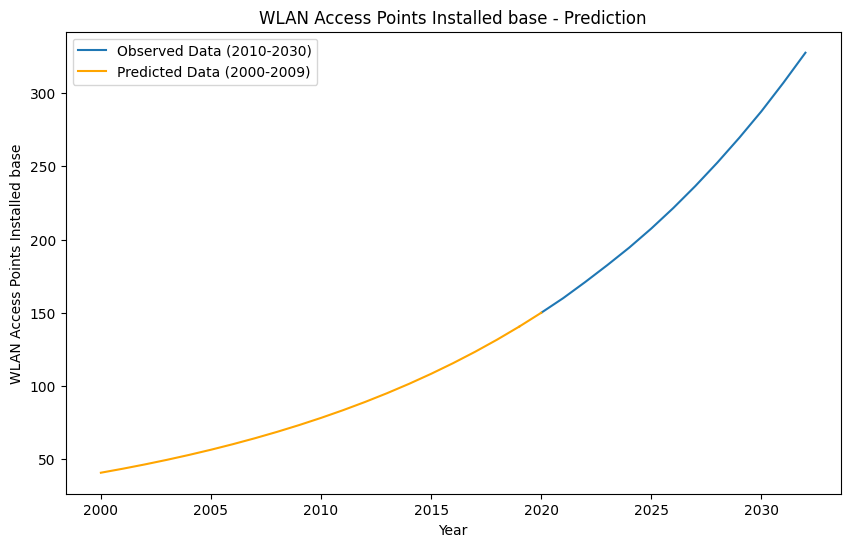

In [2]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.svm import SVR
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Prepare the data
data = {
    "Year": np.arange(2020, 2033),
    "WLAN Access Points Installed base": [150, 160, 171, 182.5, 194.5, 207.5, 221.5, 236.5, 252.5, 269.5, 287.5, 307, 327.5]
}

df = pd.DataFrame(data)

# Reverse the data for backcasting
df_reversed = df[::-1].reset_index(drop=True)

# Prepare features and target variable
X = df_reversed['Year'].values.reshape(-1, 1)
y = np.log(df_reversed['WLAN Access Points Installed base'].values.reshape(-1, 1))

# Scale the features and target
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()

X_scaled = scaler_X.fit_transform(X)
y_scaled = scaler_y.fit_transform(y)

# Define models
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(),
    "Lasso Regression": Lasso(),
    "SVR": SVR()
}

# Evaluate models
results = {}
for name, model in models.items():
    model.fit(X_scaled, y_scaled.ravel())
    y_pred = model.predict(X_scaled).reshape(-1, 1)
    mse = mean_squared_error(y_scaled, y_pred)
    results[name] = mse

print(results)

# Select the best model
best_model_name = min(results, key=results.get)
best_model = models[best_model_name]

# Output the best model name
print(f"The best model is: {best_model_name} with MSE: {results[best_model_name]}")

# Fit the best model on the scaled data
best_model.fit(X_scaled, y_scaled.ravel())

# Predict for the years 2000 to 2009
years_to_predict = np.arange(2000, 2020).reshape(-1, 1)
years_to_predict_scaled = scaler_X.transform(years_to_predict)
predictions_scaled = best_model.predict(years_to_predict_scaled).reshape(-1, 1)
predictions_log = scaler_y.inverse_transform(predictions_scaled)
predictions = np.exp(predictions_log)

# Print the predicted values
predicted_values = pd.DataFrame({
    "Year": years_to_predict.flatten(),
    "Predicted WLAN Access Points Installed base": predictions.flatten()
})
print(predicted_values)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(df['Year'], df['WLAN Access Points Installed base'], label='Observed Data (2010-2030)')
plt.plot([predicted_values['Year'].iloc[-1], df['Year'].iloc[0]], [predicted_values['Predicted WLAN Access Points Installed base'].iloc[-1], df['WLAN Access Points Installed base'].iloc[0]], color='orange')
plt.plot(predicted_values['Year'], predicted_values['Predicted WLAN Access Points Installed base'], label='Predicted Data (2000-2009)', color='orange')
plt.title('WLAN Access Points Installed base - Prediction')
plt.xlabel('Year')
plt.ylabel('WLAN Access Points Installed base')
plt.legend()
plt.show()

# 7. Predict column "Enterprise Network Electricity Usage":

In [54]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

# Load the data
data = pd.read_csv('Enterprise Usage.csv')

data.drop(columns=["Use stage carbon\nemission of\nEnterprise Network\n(Mt CO2e)"])

# Separate features and target variable
X = data.drop(columns=["Enterprise Network\nElectricity Usage \n(TWh)"])
Y = data["Enterprise Network\nElectricity Usage \n(TWh)"]

# Handle missing values in features
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

# Separate rows with non-null target values
X_train = X_scaled[~Y.isnull()]
Y_train = Y.dropna()

# Separate rows with null target values
X_test = X_scaled[Y.isnull()]
years_test = data.loc[Y.isnull(), 'Year']  # Save the years for the missing values

# Split the data into training and validation sets
X_train_split, X_val_split, Y_train_split, Y_val_split = train_test_split(X_train, Y_train, test_size=0.2, random_state=21)

# Define and train multiple models
# Linear Regression
lin_reg = LinearRegression()
lin_reg.fit(X_train, Y_train)
lin_reg_pred = lin_reg.predict(X_val_split)
lin_reg_rmse = np.sqrt(mean_squared_error(Y_val_split, lin_reg_pred))

# Random Forest Regressor
rf_reg = RandomForestRegressor(random_state=42)
rf_reg.fit(X_train, Y_train)
rf_reg_pred = rf_reg.predict(X_val_split)
rf_reg_rmse = np.sqrt(mean_squared_error(Y_val_split, rf_reg_pred))

# XGBoost Regressor
xgb_reg = XGBRegressor(random_state=42)
xgb_reg.fit(X_train, Y_train)
xgb_reg_pred = xgb_reg.predict(X_val_split)
xgb_reg_rmse = np.sqrt(mean_squared_error(Y_val_split, xgb_reg_pred))

# Evaluate models and select the best one
print("Linear Regression RMSE:", lin_reg_rmse)
print("Random Forest RMSE:", rf_reg_rmse)
print("XGBoost RMSE:", xgb_reg_rmse)

# Select the best model based on RMSE
best_model = min(
    [(lin_reg, lin_reg_rmse), 
     (rf_reg, rf_reg_rmse), 
     (xgb_reg, xgb_reg_rmse)
    ], 
    key=lambda x: x[1]
)[0]

# Predict the missing values using the best model
Y_pred = best_model.predict(X_test)

# Print the years and the predicted values
predicted_values = list(zip(years_test, Y_pred))
for year, prediction in predicted_values:
    print(f"{year}, {prediction}")

# Print first few rows of the original data with filled predictions
#data.loc[Y.isnull(), "Embodied carbon\nemission of ICT Devices\n(Mt CO2e)"] = Y_pred
#print(data.head())


Linear Regression RMSE: 3.552713678800501e-15
Random Forest RMSE: 4.199999999999999
XGBoost RMSE: 0.0010128021240234375
2000, 21.00565577065173
2001, 21.049406539364792
2002, 21.093964698767373
2003, 21.1393962453614
2004, 21.185772847212302
2005, 21.23317236593803
2006, 21.28167940202542
2008, 21.382392000435328
2009, 21.43480639171442
2010, 21.488747530835287
2012, 21.601737171210225
2013, 21.6610790147707
2014, 21.72253654457331
2015, 21.7862915054976
2016, 21.852542109151575
2017, 21.921504636361977
2018, 21.993415149976816
2019, 22.068531410757746
2021, 22.2370971132555
2022, 22.316606934474635
2023, 22.438410997835838
2024, 22.524163641513855
2025, 22.603612854562357
2026, 22.70115794898721
2027, 22.815194691118318
2028, 22.98280967003857
2029, 23.097301263552477
2030, 23.2181958445687
2031, 23.301701770902415
2032, 23.444047433445878
2033, 23.6387149124474
2034, 23.88717792766079
2035, 24.08846019899448


# 8. Predict column "Embodied Emission of Enterprise Network":

In [45]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

# Load the data
data = pd.read_csv('Enterprise Embodied.csv')

# Separate features and target variable
X = data.drop(columns=["Embodied carbon\nemission of\nEnterprise Network\n(Mt CO2e)"])
Y = data["Embodied carbon\nemission of\nEnterprise Network\n(Mt CO2e)"]

# Handle missing values in features
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

# Separate rows with non-null target values
X_train = X_scaled[~Y.isnull()]
Y_train = Y.dropna()

# Separate rows with null target values
X_test = X_scaled[Y.isnull()]
years_test = data.loc[Y.isnull(), 'Year']  # Save the years for the missing values

# Split the data into training and validation sets
X_train_split, X_val_split, Y_train_split, Y_val_split = train_test_split(X_train, Y_train, test_size=0.2, random_state=21)

# Define and train multiple models
# Linear Regression
lin_reg = LinearRegression()
lin_reg.fit(X_train, Y_train)
lin_reg_pred = lin_reg.predict(X_val_split)
lin_reg_rmse = np.sqrt(mean_squared_error(Y_val_split, lin_reg_pred))

# Random Forest Regressor
rf_reg = RandomForestRegressor(random_state=42)
rf_reg.fit(X_train, Y_train)
rf_reg_pred = rf_reg.predict(X_val_split)
rf_reg_rmse = np.sqrt(mean_squared_error(Y_val_split, rf_reg_pred))

# XGBoost Regressor
xgb_reg = XGBRegressor(random_state=42)
xgb_reg.fit(X_train, Y_train)
xgb_reg_pred = xgb_reg.predict(X_val_split)
xgb_reg_rmse = np.sqrt(mean_squared_error(Y_val_split, xgb_reg_pred))

# Evaluate models and select the best one
print("Linear Regression RMSE:", lin_reg_rmse)
print("Random Forest RMSE:", rf_reg_rmse)
print("XGBoost RMSE:", xgb_reg_rmse)

# Select the best model based on RMSE
best_model = max(
    [(lin_reg, lin_reg_rmse), 
     (rf_reg, rf_reg_rmse), 
     (xgb_reg, xgb_reg_rmse)
    ], 
    key=lambda x: x[1]
)[0]

# Predict the missing values using the best model
Y_pred = best_model.predict(X_test)

# Print the years and the predicted values
predicted_values = list(zip(years_test, Y_pred))
for year, prediction in predicted_values:
    print(f"{year}, {prediction}")

# Print first few rows of the original data with filled predictions
#data.loc[Y.isnull(), "Embodied carbon\nemission of ICT Devices\n(Mt CO2e)"] = Y_pred
#print(data.head())


Linear Regression RMSE: 4.440892098500626e-16
Random Forest RMSE: 0.54
XGBoost RMSE: 0.0009210109710693359
2000, 2.04
2001, 2.04
2002, 2.04
2003, 2.04
2004, 2.04
2005, 2.04
2006, 2.04
2008, 2.04
2009, 2.38
2010, 2.9
2012, 2.9
2013, 2.9
2014, 2.975
2015, 2.975
2016, 3.175
2017, 3.07
2018, 3.07
2019, 3.07
2021, 3.07
2022, 3.07
2023, 3.07
2024, 3.07
2025, 3.07
2026, 3.07
2027, 3.07
2028, 3.07
2029, 3.07
2030, 3.07
2031, 3.07
2032, 3.07
2033, 3.07
2034, 3.07
2035, 3.07
